# Synthetic reference model

- This simplified 2D discrete-continuum synthetic reference model generates virtual observation data, subsequently used as observed data for the stochastic model(Stoch_model.ipynb).

- NOTE: Please be aware that the utilized shapefiles do not represent a specific location in the real world; rather, they are used to create a synthetic reference model using "real coordinates."

In [1]:
# Load packages
%run "00_Packages.py"

c:\Users\Marcus\.conda\envs\cfpy_env\lib\site-packages\mplstereonet\stereonet_axes.py:17: PendingDeprecationWarning: Overriding `Axes.cla` in StereonetAxes is pending deprecation in 3.6 and will be fully deprecated in favor of `Axes.clear` in the future. Please report this to the 'mplstereonet.stereonet_axes' author.
  class StereonetAxes(LambertAxes):


In [2]:
# Load matplotlib stylesheet
plt.style.use('stylesheet.mplstyle')

## Folder and file structure

### Create folders and paths

In [3]:
# Define current directory as main directory variable
main_dir = os.getcwd()
print('Main Directory:', main_dir)

Main Directory: c:\GW_GitHub\TUD_GW_MOD\content\02_MSc_Thesis_Karst\01_Synthetic_Example\notebooks


In [4]:
# Create the folder structure
# Define folder und subfolder names
folders = ['01_data', '02_model', '03_results']
subfolders = [['rst', 'shp', 'csv','xlsx', 'txt'],
                     ['mf_syn', 'mf_stoch', 'gis', ],
                     ['shp', 'img', 'pdf', 'rst', 'gif']]
# Define folders class 
folders = Folders_c(main_dir = main_dir, folders = folders,
                    subfolders = subfolders)
# Generate the folders
folders.create_folders()

Folders were generated


### Define paths

In [5]:
# Save all paths to the folders in a dictionary
p_folders = folders.path_folders()

### Read and list all files

In [6]:
# List all files in the folder '01_data'
d_files = Files_c(main_dir = main_dir, folders = ['01_data'],
                  subfolders = subfolders[0:1])
# Create a dictionary with all files (key) and corresponding path (value) 
d_files.dict_all_files()

{'Alluvial Aquifer.cpg': 'c:\\GW_GitHub\\TUD_GW_MOD\\content\\02_MSc_Thesis_Karst\\01_Synthetic_Example\\notebooks\\01_data\\shp\\Alluvial Aquifer.cpg',
 'Alluvial Aquifer.dbf': 'c:\\GW_GitHub\\TUD_GW_MOD\\content\\02_MSc_Thesis_Karst\\01_Synthetic_Example\\notebooks\\01_data\\shp\\Alluvial Aquifer.dbf',
 'Alluvial Aquifer.prj': 'c:\\GW_GitHub\\TUD_GW_MOD\\content\\02_MSc_Thesis_Karst\\01_Synthetic_Example\\notebooks\\01_data\\shp\\Alluvial Aquifer.prj',
 'Alluvial Aquifer.shp': 'c:\\GW_GitHub\\TUD_GW_MOD\\content\\02_MSc_Thesis_Karst\\01_Synthetic_Example\\notebooks\\01_data\\shp\\Alluvial Aquifer.shp',
 'Alluvial Aquifer.shx': 'c:\\GW_GitHub\\TUD_GW_MOD\\content\\02_MSc_Thesis_Karst\\01_Synthetic_Example\\notebooks\\01_data\\shp\\Alluvial Aquifer.shx',
 'Catchment_gwr_karst.cpg': 'c:\\GW_GitHub\\TUD_GW_MOD\\content\\02_MSc_Thesis_Karst\\01_Synthetic_Example\\notebooks\\01_data\\shp\\Catchment_gwr_karst.cpg',
 'Catchment_gwr_karst.dbf': 'c:\\GW_GitHub\\TUD_GW_MOD\\content\\02_MSc_Thes

In [7]:
# Read all files in the folder '01_data'
d_dict = read_all_files(d_files.dict_all_files())
# Show all keys of the dictionary
d_dict.keys()

Alluvial Aquifer.shp
Catchment_gwr_karst.shp
Conduits.shp
Inlets.shp
Interaction.shp
Isohypse.shp
Karst Aquifer.shp
Karst conduit.shp
Karst.shp
Matrix.shp


Observations.shp
Outlets.shp
Study_site.shp
Well MAR.shp
geo40x48.csv
Par_stat.xlsx
Par_syn.xlsx
PEST.xlsx
RCH.xlsx


dict_keys(['Alluvial Aquifer', 'Alluvial Aquifer-001', 'Catchment_gwr_karst', 'Catchment_gwr_karst-001', 'Catchment_gwr_karst-002', 'Catchment_gwr_karst-003', 'Conduits', 'Conduits-001', 'Conduits-002', 'Conduits-003', 'Inlets', 'Inlets-001', 'Inlets-002', 'Inlets-003', 'Interaction', 'Interaction-001', 'Isohypse', 'Isohypse-001', 'Karst Aquifer', 'Karst Aquifer-001', 'Karst conduit', 'Karst conduit-001', 'Karst', 'Karst-001', 'Matrix', 'Matrix-001', 'Matrix-002', 'Observations', 'Observations-001', 'Observations-002', 'Observations-003', 'Observations-004', 'Observations-005', 'Outlets', 'Outlets-001', 'Study_site', 'Study_site-001', 'Well MAR', 'Well MAR-001', 'geo40x48', 'Par_stat', 'Par_syn', 'PEST', 'RCH'])

# Set up and configure the FloPy model

In [8]:
# Define model name and workspace
modelname = "mf_syn"
model_ws = os.path.join(p_folders['02_model_mf_syn'])
# Define the MODFLOW model
mf = flopy.modflow.Modflow(modelname, exe_name="CFPv2.exe",
                           verbose=True, model_ws=model_ws)

### Parameters

In [9]:
'''Overview of parameters'''
# Replace NaN values with empty strings
d_dict['Par_syn'].fillna('', inplace=True)
# Set column 'Parameter name' as the index
d_dict['Par_syn-i'] = d_dict['Par_syn'].set_index('Parameter name')

In [10]:
# Show the parameters of the model
d_dict['Par_syn-i']

,Value,Unit,Additional Information,Category
Parameter name,,,,
Model domain,,,,Discretization
Spatial discretization,,,,Discretization
Length unit,Meters,L,,Discretization
Time unit,Seconds,T,,Discretization
Easting dimension,1200,L,,Discretization
Northing dimension,1000,L,,Discretization
Global grid size,25,L,Global Refinement (cell x and y dimension will...,Discretization
Number of columns,48,-,,Discretization
Number of rows,40,-,,Discretization


## Model Grid & Discretization - DIS

### Unit

In [11]:
# Define length unit 
lenuni = d_dict['Par_syn-i']['Value']['Length unit'] # "Meters" # 2
print('Length unit:', lenuni)

# Define time units: 1=seconds, 2=minutes, 3=hours, 4=days
itmuni = d_dict['Par_syn-i']['Value']['Time unit'] # "Seconds" # 1
print('Time unit:', itmuni)

Length unit: Meters
Time unit: Seconds


### Spatial DIS 

In [12]:
# Study site polygon
shp_ss = d_dict['Study_site']

In [13]:
# Defining Global Refinements (cell x and y dimension will be the same)
celGlo = d_dict['Par_syn-i']['Value']['Global grid size'] # meters
# Calculating Global Model (Glo) (Extent of the model grid)
GloRefBox = shp_ss.bounds
print('Data of GloRefBox:\n', GloRefBox, '\n')
# Calculating the number of rows and columns
GloLx = GloRefBox['maxx'][0] - GloRefBox['minx'][0] #x_max - x_min
GloLy = GloRefBox['maxy'][0] - GloRefBox['miny'][0] #y_max - y_min
nrow = math.ceil(GloLy/celGlo)
ncol = math.ceil(GloLx/celGlo)
print('Number of rows: %d and number of cols: %d' % (nrow,ncol))
# Calculating the cell size along row and column
delr = np.array([celGlo]*ncol)
delc = np.array([celGlo]*nrow)
print('Grid cell size along row:\n', delr)
print('Grid cell size along col:\n', delc)

Data of GloRefBox:
             minx          miny           maxx          maxy
0  320857.338297  3.982013e+06  322057.338297  3.983013e+06 

Number of rows: 40 and number of cols: 48
Grid cell size along row:
 [25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25
 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25]
Grid cell size along col:
 [25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25
 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25]


In [14]:
# Number of layers
nlay = 1

### Time DIS

In [15]:
'''Time discretization''' 
# Define the time units
# time units: 1=seconds, 2=minutes, 3=hours, 4=days
itmuni = itmuni
print(f'Time unit: {itmuni}')
# number of stress periods
nper = d_dict['Par_syn-i']['Value']['Number of stress periods']
print('Number of stress periods:', nper)
# length of stress periods
# this variable assumes a uniform time discretization, i.e. all stress periods
# have the same number of time steps except the first stationary time step
perlen = d_dict['Par_syn-i']['Value']['Length of stress periods'] 
print('Length of stress periods:', itmuni)
# number of time steps in each stress period (integer array)
n_stps = np.ones(nper)
n_stps = n_stps.tolist()
# ensure that fist stress period (stationary) has length 1
n_stps[0] = 1.0
print('\nNumber of timesteps in each stress period:',n_stps)
# list with "False" everywhere except 0th element (which is "True")
# to specify steady state ("True") or transient ("False")
steady = np.zeros(nper, dtype=np.bool_)
# ensure stationary first stress period
steady[0] = 1
print('\nSpecify steady state ("True" = 1) or transient ("False" = 0):\n', steady)

Time unit: Seconds
Number of stress periods: 48
Length of stress periods: Seconds

Number of timesteps in each stress period: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Specify steady state ("True" = 1) or transient ("False" = 0):
 [ True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False]


### Projection of DIS 

- Define coordinate reference system (CRS) of the model

In [16]:
# Get the projection of the shapefile
Proj_crs = pyproj.CRS(shp_ss.crs).to_epsg()
Proj_crs

32637

### Write DIS

In [17]:
# Define the discretization of the model
dis = flopy.modflow.ModflowDis(model = mf, nrow = nrow, ncol = ncol,
                               nper = nper, delr = delr, delc = delc, 
                               nlay = nlay, # top = top, botm = botm,
                               perlen=perlen, nstp=n_stps, steady=steady,
                               itmuni=itmuni, lenuni=lenuni,
                               xul= GloRefBox['minx'][0], 
                               yul= GloRefBox['maxy'][0],
                               rotation = 0,
                               crs = Proj_crs,
                               start_datetime = datetime.now().strftime('%m/%d/%Y'))

adding Package:  DIS


### Model DIS - Update (Layer top and bottom elevation) 

In [18]:
# Model top
top = np.ones((mf.dis.nrow, mf.dis.ncol)) 
top = top * d_dict['Par_syn-i']['Value']['Model top']
# Overwrite the top of the model
mf.dis.top = top

In [19]:
# Model bottom
botm = np.ones((mf.dis.nrow, mf.dis.ncol))
botm = botm * d_dict['Par_syn-i']['Value']['Model bottom']
# Overwrite the bottom of the model
mf.dis.botm = botm

### Plot grid layer top and bottom

plotting DIS package Util2d instance: top
plotting DIS package Util3d instance: botm


[<Axes: title={'center': ' model_top'}>,
 <Axes: title={'center': 'botm Layer  layer 1'}>]

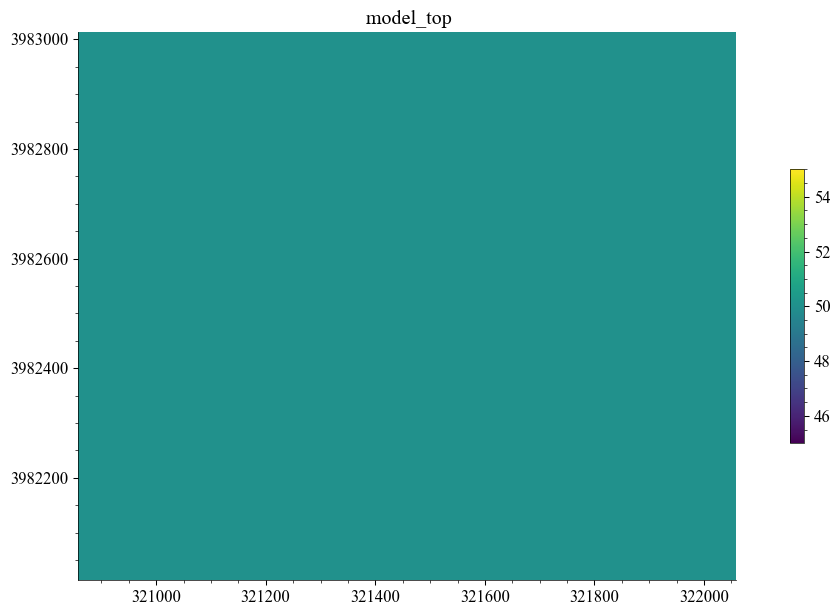

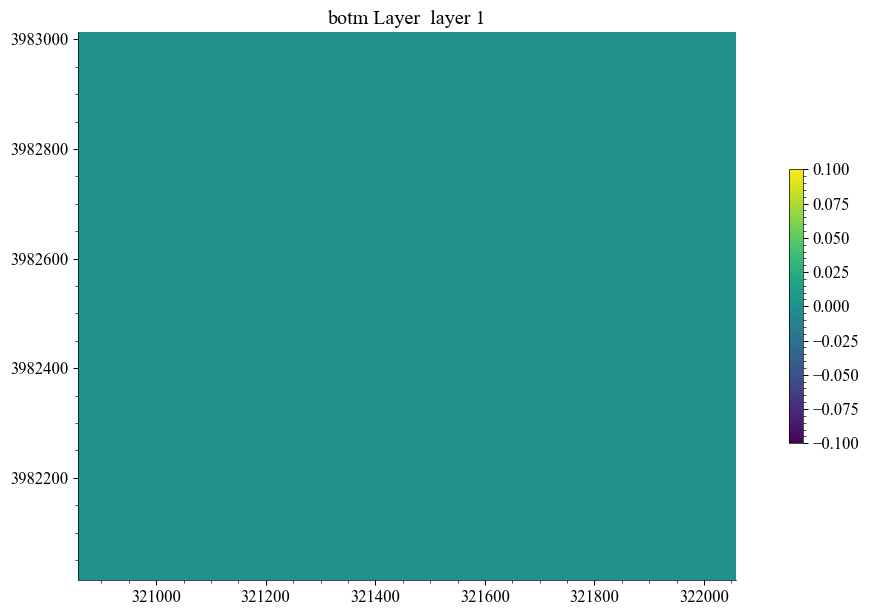

In [20]:
# Plot the elevation of the model grid
dis.plot(colorbar=True)

### Intersect and locate features within grid

In [21]:
# Create the intersection object
ix = GridIntersect(mf.modelgrid, method="vertex")
# Save the intesected files in a temporary dictionary
d_dict_temp = grid_ix(ix = ix, data_dict = d_dict, s_key='', 
                         single_features = True)

Alluvial Aquifer ['Polygon']
Alluvial Aquifer-001 ['Polygon']
Catchment_gwr_karst-001 ['Polygon']
Catchment_gwr_karst-002 ['Polygon']
Catchment_gwr_karst-003 ['Polygon']
Conduits-001 ['LineString']
Conduits-002 ['LineString']
Conduits-003 ['LineString']
Inlets-001 ['Point']
Inlets-002 ['Point']
Inlets-003 ['Point']
Interaction ['LineString']
Interaction-001 ['LineString']
Isohypse ['LineString']
Isohypse-001 ['LineString']
Karst Aquifer ['Polygon']
Karst Aquifer-001 ['Polygon']
Karst conduit ['Point']
Karst conduit-001 ['Point']
Karst ['Point']
Karst-001 ['Point']
Matrix-001 ['Point']
Matrix-002 ['Point']
Observations-001 ['Point']
Observations-002 ['Point']
Observations-003 ['Point']
Observations-004 ['Point']
Observations-005 ['Point']
Outlets ['Point']
Outlets-001 ['Point']
Study_site ['Polygon']
Study_site-001 ['Polygon']
Well MAR ['Point']
Well MAR-001 ['Point']
Error in geo40x48, probably no shapefile/geometry. Is this maybe a raster file or an alredy existing intersection datase

In [22]:
# Show the keys of the temporary dictionary (ending with '-ix')
d_dict_temp.keys()

dict_keys(['Alluvial Aquifer-ix', 'Alluvial Aquifer-001-ix', 'Catchment_gwr_karst-001-ix', 'Catchment_gwr_karst-002-ix', 'Catchment_gwr_karst-003-ix', 'Conduits-001-ix', 'Conduits-002-ix', 'Conduits-003-ix', 'Inlets-001-ix', 'Inlets-002-ix', 'Inlets-003-ix', 'Interaction-ix', 'Interaction-001-ix', 'Isohypse-ix', 'Isohypse-001-ix', 'Karst Aquifer-ix', 'Karst Aquifer-001-ix', 'Karst conduit-ix', 'Karst conduit-001-ix', 'Karst-ix', 'Karst-001-ix', 'Matrix-001-ix', 'Matrix-002-ix', 'Observations-001-ix', 'Observations-002-ix', 'Observations-003-ix', 'Observations-004-ix', 'Observations-005-ix', 'Outlets-ix', 'Outlets-001-ix', 'Study_site-ix', 'Study_site-001-ix', 'Well MAR-ix', 'Well MAR-001-ix'])

In [23]:
# Write the keys and values of the temporary dictionary to the data dictionary
for key,value in d_dict_temp.items():
    print(key)
    d_dict[key] = value
# Write the cellids objects to the data dictionary
for key,value in d_dict_temp.items():
    if '-ix' in key:
        d_dict[key+'-cid'] = value['cellids']
        print(key+'-cid')

Alluvial Aquifer-ix
Alluvial Aquifer-001-ix
Catchment_gwr_karst-001-ix
Catchment_gwr_karst-002-ix
Catchment_gwr_karst-003-ix
Conduits-001-ix
Conduits-002-ix
Conduits-003-ix
Inlets-001-ix
Inlets-002-ix
Inlets-003-ix
Interaction-ix
Interaction-001-ix
Isohypse-ix
Isohypse-001-ix
Karst Aquifer-ix
Karst Aquifer-001-ix
Karst conduit-ix
Karst conduit-001-ix
Karst-ix
Karst-001-ix
Matrix-001-ix
Matrix-002-ix
Observations-001-ix
Observations-002-ix
Observations-003-ix
Observations-004-ix
Observations-005-ix
Outlets-ix
Outlets-001-ix
Study_site-ix
Study_site-001-ix
Well MAR-ix
Well MAR-001-ix
Alluvial Aquifer-ix-cid
Alluvial Aquifer-001-ix-cid
Catchment_gwr_karst-001-ix-cid
Catchment_gwr_karst-002-ix-cid
Catchment_gwr_karst-003-ix-cid
Conduits-001-ix-cid
Conduits-002-ix-cid
Conduits-003-ix-cid
Inlets-001-ix-cid
Inlets-002-ix-cid
Inlets-003-ix-cid
Interaction-ix-cid
Interaction-001-ix-cid
Isohypse-ix-cid
Isohypse-001-ix-cid
Karst Aquifer-ix-cid
Karst Aquifer-001-ix-cid
Karst conduit-ix-cid
Karst c

### Plot grid and spatial features

In [24]:
def plot_system(ax):
    # Plot the grid, points, lines and polygon features of the system
    # Grid
    mf.modelgrid.plot(ax=ax, linewidth=0.5, color="black")
    # Lines
    d_dict['Isohypse'].plot(ax=ax, linewidth = 3, color = 'blue', label='Isohypse')
    d_dict['Conduits'].plot(ax=ax, linewidth = 3, color = 'brown',label='Conduit') 
    # Polygon
    d_dict['Alluvial Aquifer'].plot(ax=ax, color="darkred", alpha = 0.25)
    d_dict['Karst Aquifer'].plot(ax=ax, color="gray", alpha = 0.25)
    d_dict['Catchment_gwr_karst'].plot(ax=ax, color="lightblue", alpha = 1.0)
    # Points
    d_dict['Observations'].plot(ax=ax, color="orange", markersize=50, label='Obs')
    d_dict['Observations'][d_dict['Observations']['Karst']=='Conduit'].plot(ax=ax, color="black", markersize=20, label='Conduit')
    d_dict['Inlets'].plot(ax=ax, color="navy", markersize=50, label='Inlets')
    d_dict['Outlets'].plot(ax=ax, color="red", markersize=50, label='Outlets')
    # Define the label and legend
    plt.xlabel('x [m]')
    plt.ylabel('y [m]')
    plt.legend()


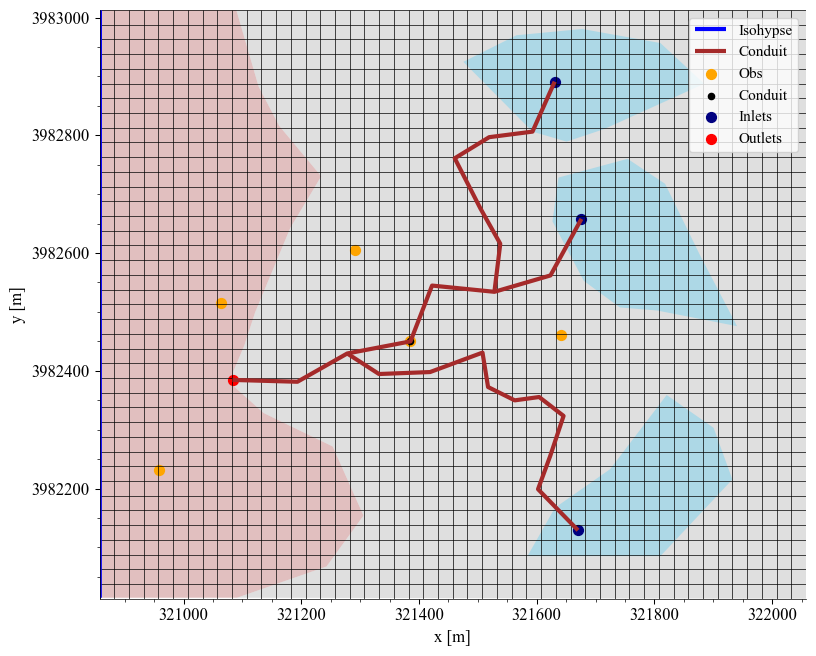

In [25]:
# Plot the system
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
plot_system(ax=ax)

## Parametrization: Initial and Boundary Conditions

### BAS - Basic Package

In [26]:
'''BAS - BASIC INFORMATION'''
# If ibound < 0: constant head, if = 0: inactive, if > 0: active.
# Create arrays to indicate active cells (ibound) and starting heads (H_init)
# Integer array of dim (z,y,x), makes all cells active 
ibound = np.ones((mf.dis.nlay, mf.dis.nrow, mf.dis.ncol), dtype=np.int32)
# Initialize starting head array
strt = np.ones((mf.dis.nlay, mf.dis.nrow, mf.dis.ncol), dtype=np.float32)
# Assign starting head values to all cells
strt[:,:,:] = d_dict['Par_syn-i']['Value']['Matrix starting head']



In [27]:
# Define the basic package
bas = flopy.modflow.ModflowBas(mf, ibound=ibound, strt=strt)

adding Package:  BAS6


plotting BAS6 package Util3d instance: ibound
plotting BAS6 package Util3d instance: strt


[<Axes: title={'center': 'ibound layer 1'}>,
 <Axes: title={'center': 'strt layer 1'}>]

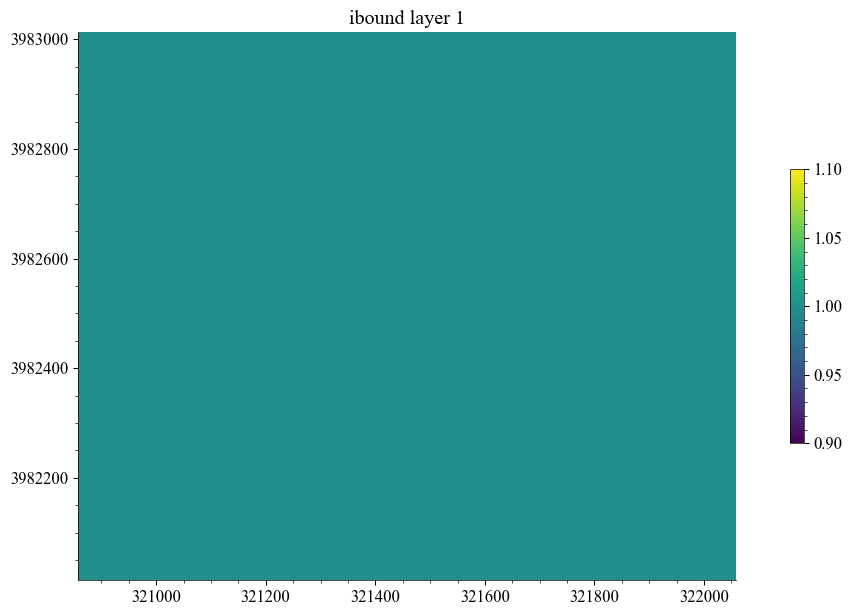

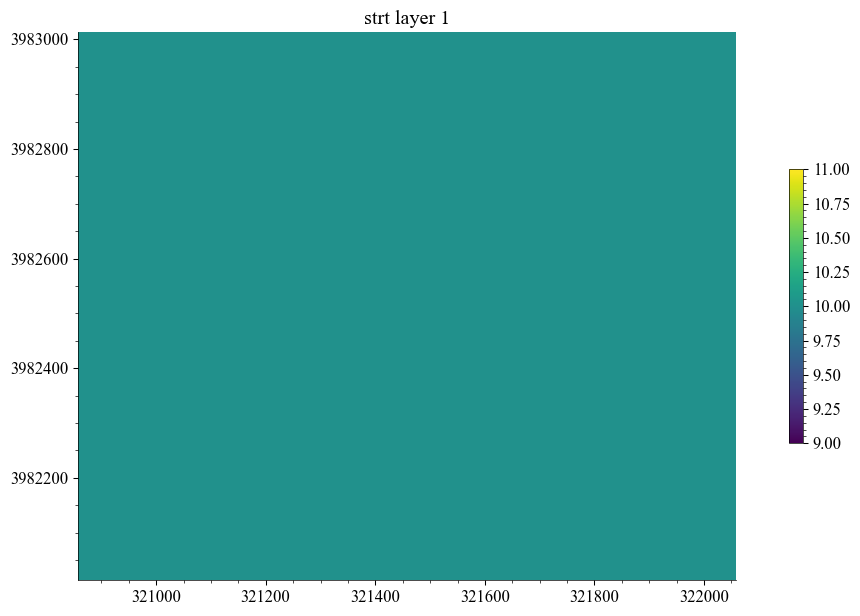

In [28]:
# Plot the basic package settings
bas.plot()

### LPF - Layer Property File

In [29]:
# Horizontal hydraulic conductivity
# Horizontal hydraulic conductivity for the karst system
hk_karst =  d_dict['Par_syn-i']['Value']['Horizontal hydraulic conductivity karst']
# Horizontal hydraulic conductivity for the alluvial system
hk_alluvial = d_dict['Par_syn-i']['Value']['Horizontal hydraulic conductivity alluvial']
# Create an array with ones and multiply it with the horizontal hydraulic conductivity of the karst system
hk = np.ones((mf.dis.nlay, mf.dis.nrow, mf.dis.ncol)) * hk_karst
# Replace the corresponding cells with the horizontal hydraulic conductivity of the alluvial system
for i in range(d_dict['Alluvial Aquifer'].shape[0]):
    for row,col in d_dict[f'Alluvial Aquifer-{i+1:03d}-ix-cid']:
            hk[0,row,col] = hk_alluvial

In [30]:
# Vertical hydraulic conductivity
# Vertical hydraulic conductivity for the karst system
vk_karst =  d_dict['Par_syn-i']['Value']['Vertical hydraulic conductivity karst']
# Vertical hydraulic conductivity for the alluvial system
vk_alluvial = d_dict['Par_syn-i']['Value']['Vertical hydraulic conductivity alluvial']
# Create an array with ones and multiply it with the vertical hydraulic conductivity of the karst system
vk = np.ones((mf.dis.nlay, mf.dis.nrow, mf.dis.ncol)) * vk_karst
# Replace the corresponding cells with the vertical hydraulic conductivity of the alluvial system
for i in range(d_dict['Alluvial Aquifer'].shape[0]):
    for row,col in d_dict[f'Alluvial Aquifer-{i+1:03d}-ix-cid']:
            vk[0,row,col] = vk_alluvial

In [31]:
# Specific storage
# Specific storage for the karst system
ss_karst =  d_dict['Par_syn-i']['Value']['Specific storage karst']
# Specific storage for the alluvial system
ss_alluvial = d_dict['Par_syn-i']['Value']['Specific storage alluvial']
# Create an array with ones and multiply it with the specific storage of the karst system
ss = np.ones((mf.dis.nlay, mf.dis.nrow, mf.dis.ncol)) * ss_karst
# Replace the corresponding cells with the specific storage of the alluvial system
for i in range(d_dict['Alluvial Aquifer'].shape[0]):
    for row,col in d_dict[f'Alluvial Aquifer-{i+1:03d}-ix-cid']:
            ss[0,row,col] = ss_alluvial

In [32]:
# Specific yield
# Specific yield for the karst system
sy_karst =  d_dict['Par_syn-i']['Value']['Specific yield karst']
# Specific yield for the alluvial system
sy_alluvial = d_dict['Par_syn-i']['Value']['Specific yield alluvial']
# Create an array with ones and multiply it with the specific yield of the karst system
sy = np.ones((mf.dis.nlay, mf.dis.nrow, mf.dis.ncol)) * sy_karst
# Replace the corresponding cells with the specific yield of the alluvial system
for i in range(d_dict['Alluvial Aquifer'].shape[0]):
    for row,col in d_dict[f'Alluvial Aquifer-{i+1:03d}-ix-cid']:
            sy[0,row,col] = sy_alluvial

In [33]:
# Unit number to save outputs to 
ipakcb = 50
# Value assigned to dry cells
hdry = 999.
# 0=confined, >0 = unconfined/convertible
laytyp = 1
# Method of calculating interblock tranmissivity, 0=harmonic mean (default)
layavg = 0
# Wetting, 0=inactive, 1=active
laywet = 0

In [34]:
# Define the layer property flow package
lpf = flopy.modflow.ModflowLpf(mf, laytyp=laytyp, laywet=laywet, 
                               ipakcb=ipakcb, hdry=hdry, hk=hk,
                               vka=vk, wetdry=laywet, ss=ss, sy=sy)

Adding mf_syn.cbc (unit=50) to the output list.
adding Package:  LPF


<Axes: title={'center': 'hk layer 1'}>

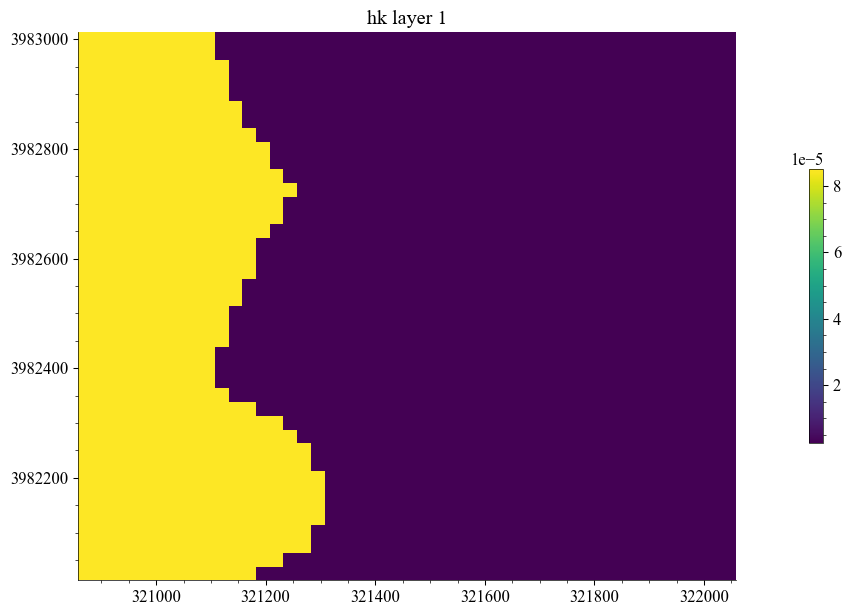

In [35]:
# Plot the defined hydraulic conductivity
mf.lpf.hk.plot(colorbar=True)

plotting LPF package Util3d instance: hk
plotting LPF package Util3d instance: hani
plotting LPF package Util3d instance: vka
plotting LPF package Util3d instance: ss
plotting LPF package Util3d instance: sy
plotting LPF package Util3d instance: vkcb
plotting LPF package Util3d instance: wetdry


[<Axes: title={'center': 'hk layer 1'}>,
 <Axes: title={'center': 'hani layer 1'}>,
 <Axes: title={'center': 'vka layer 1'}>,
 <Axes: title={'center': 'ss layer 1'}>,
 <Axes: title={'center': 'sy layer 1'}>,
 <Axes: title={'center': 'vkcb layer 1'}>,
 <Axes: title={'center': 'wetdry layer 1'}>]

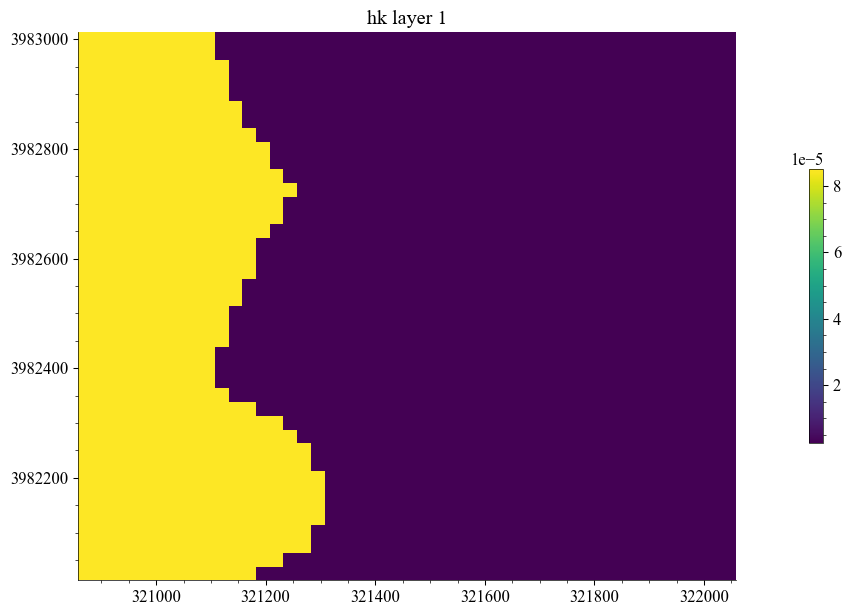

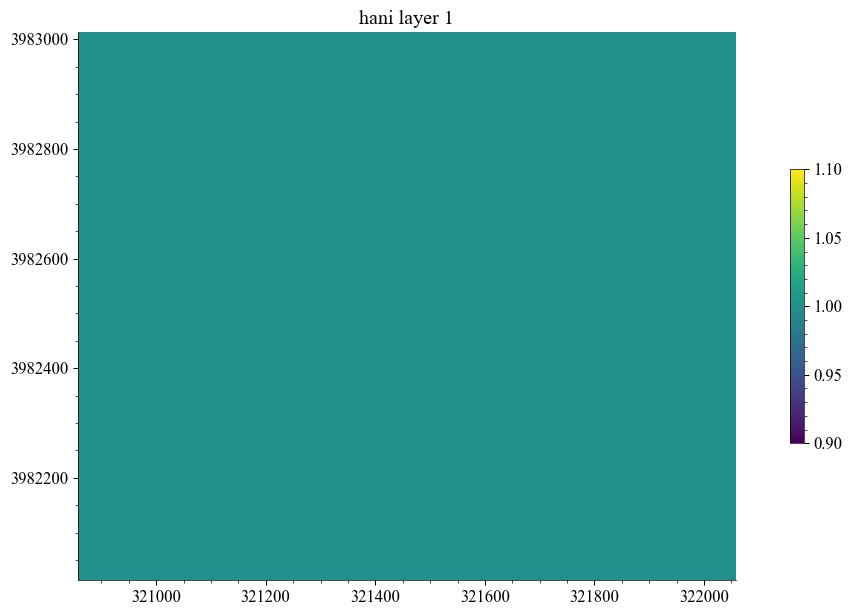

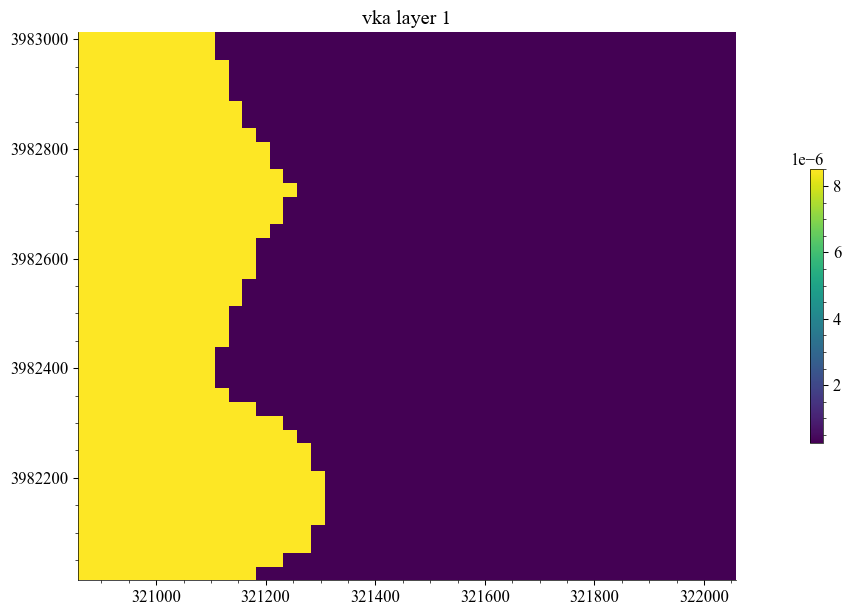

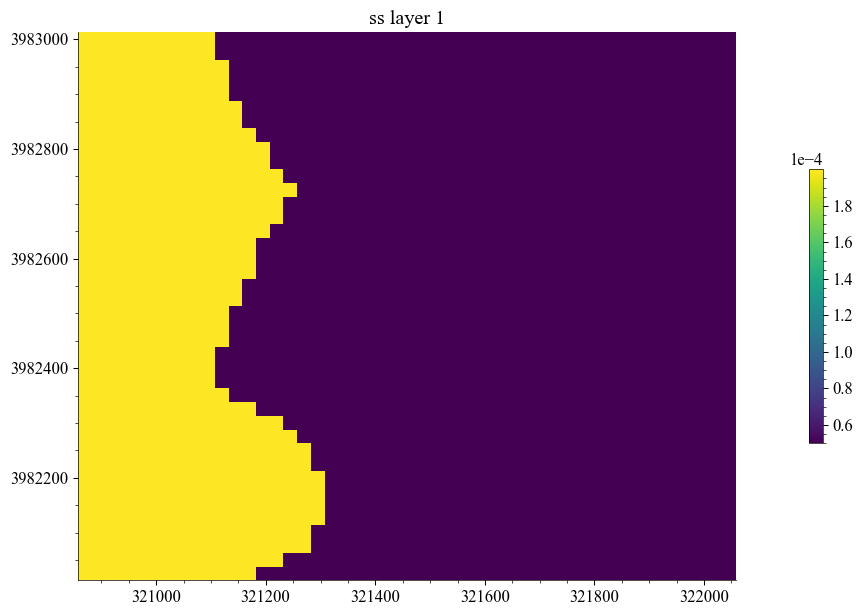

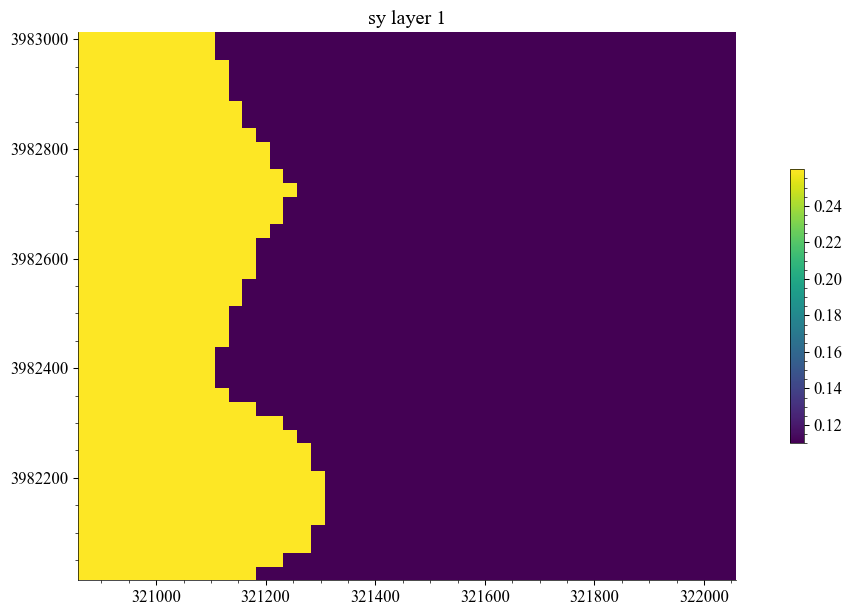

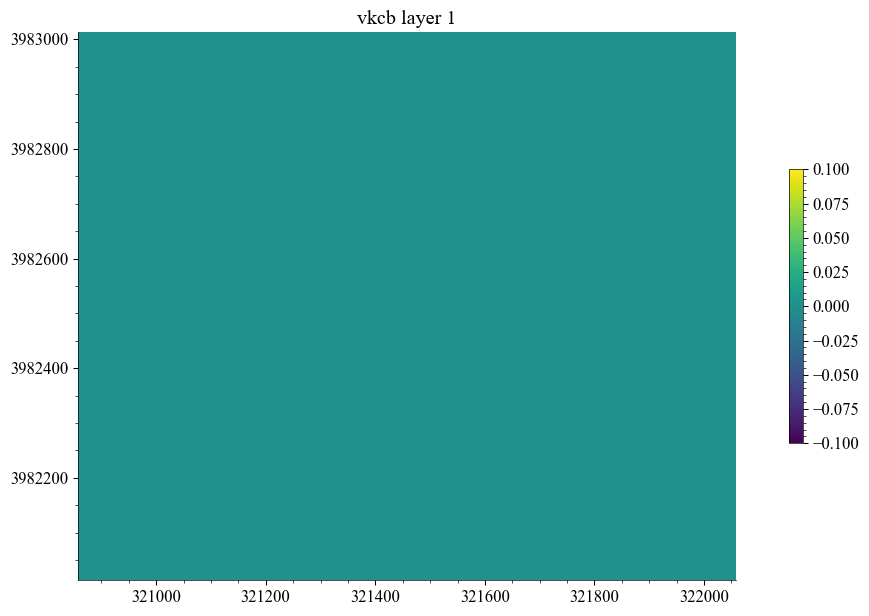

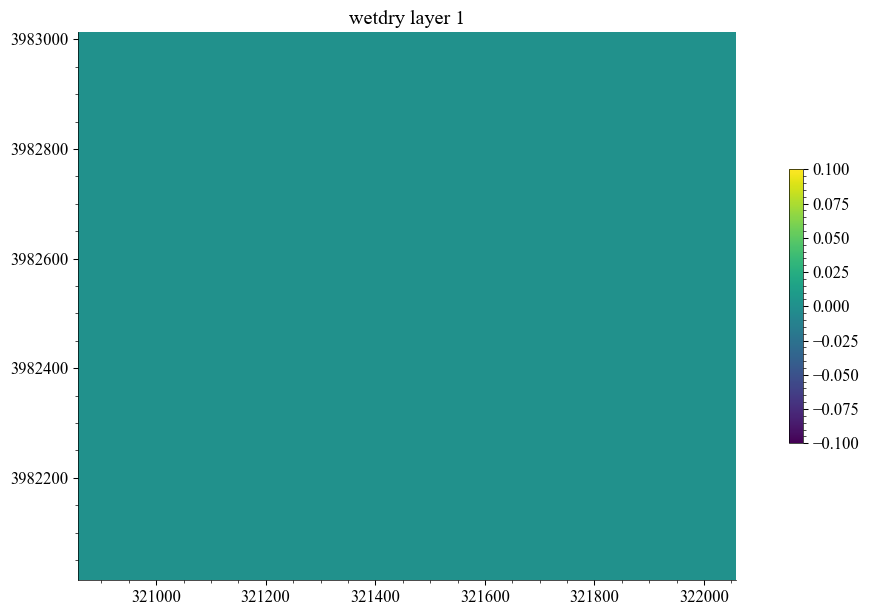

In [36]:
# Plot the layer property flow package settings
mf.lpf.plot()

### BC - Boundary Condition

In [37]:
# Calculate the direct groundwater recharge based on the area of the catchment divided by the size of the model grid cell
d_dict['Catchment_gwr_karst']['gwr_catchment'] = d_dict['Catchment_gwr_karst']['SURFACE']/(celGlo*celGlo)

In [38]:
# Merge the catchment with the corresponding inlets
d_dict['gdf_inlets'] = pd.merge(d_dict['Inlets'], 
                                d_dict['Catchment_gwr_karst'][['Catchment','SURFACE', 'gwr_catchment']], on='Catchment', how='left')

In [39]:
# Show the geopandas dataframe
d_dict['gdf_inlets']

,Name,Elev[m],Catchment,geometry,SURFACE,gwr_catchment
0,inlet1,5.0,Catchment_1,POINT (321675.881 3982657.975),51222,81.9552
1,inlet2,5.0,Catchment_2,POINT (321630.466 3982891.093),48454,77.5264
2,inlet3,5.0,Catchment_3,POINT (321670.076 3982129.074),50095,80.1520


#### RCH - Recharge

In [40]:
# Show the arra with the timestep length
mf.dis.perlen.array

array([3600., 3600., 3600., 3600., 3600., 3600., 3600., 3600., 3600.,
       3600., 3600., 3600., 3600., 3600., 3600., 3600., 3600., 3600.,
       3600., 3600., 3600., 3600., 3600., 3600., 3600., 3600., 3600.,
       3600., 3600., 3600., 3600., 3600., 3600., 3600., 3600., 3600.,
       3600., 3600., 3600., 3600., 3600., 3600., 3600., 3600., 3600.,
       3600., 3600., 3600.], dtype=float32)

In [41]:
# Define the proportion of the precipitation for the diffuse recharge 
rch_proportion = d_dict['Par_syn-i']['Value']['Diffuse recharge']
# Use xlsx file to define RCH values as timeseries array
rch_ts = np.array(d_dict['RCH']['RCH'])
# Dictionary of recharge fluxes for each stress period
rech = {}
# Loop through each timestep and apply the proportion of the recharge 
for num, rech_in in enumerate(rch_ts):
    # Apply recharge to all cells
    rech_data = np.ones((mf.dis.nrow, mf.dis.ncol)) *rech_in  * rch_proportion 
    # Link the recharge array to the stress period
    rech[num] = rech_data

In [42]:
# Flag, 1=rech only applied to top layer
nrchop = 1
# If non-zero, cell budget data will be saved
ipakcb = 50
# Layer to which recharge is applied to (only used if nrchop=2)
irch = 1

In [43]:
# Define the recharge package
rch = flopy.modflow.mfrch.ModflowRch(mf, nrchop=nrchop, ipakcb=ipakcb, 
                                     rech=rech, irch=irch)


adding Package:  RCH


[<Axes: title={'center': 'RECH stress period 1'}>]

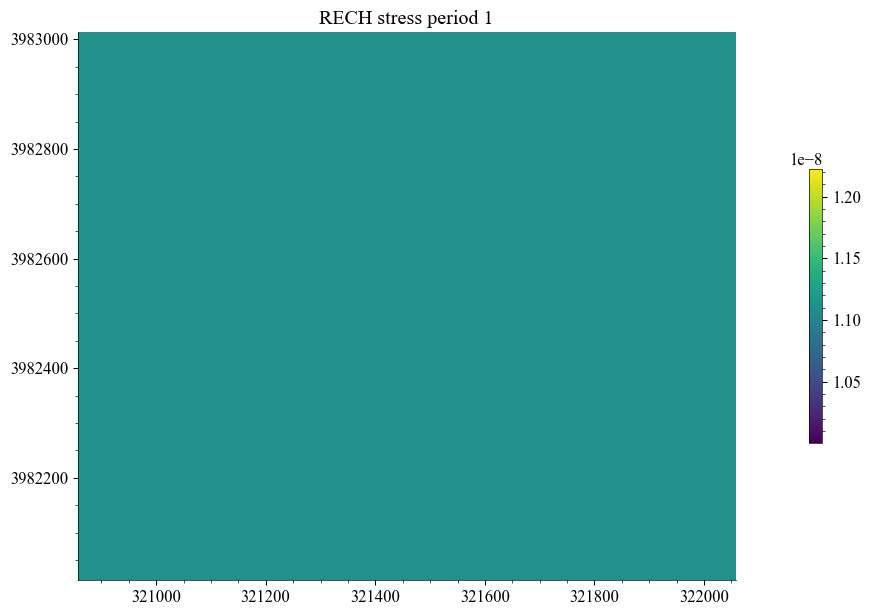

In [44]:
# Plot the recharge package settings for the first stress period
mf.rch.rech.plot(kper=0, colorbar=True)

#### CHD - Constant Head

In [45]:
# Define the constant-head values for each stress period and layer
starting_head = d_dict['Par_syn-i']['Value']['Starting head']
ending_head = d_dict['Par_syn-i']['Value']['Ending head']
# Cretae the stressperiod data for the constant-head package
spd_list = []
for kper in range(mf.dis.nper):
    spd_kper = []
    for k in range(mf.dis.nlay):
        for i in range(d_dict['Isohypse'].shape[0]): # Isohypse 
            for row,col in d_dict[f'Isohypse-{i+1:03d}-ix-cid']: # cellids
                spd_layer = [[k, row, col, starting_head, ending_head]]
                #{0: [[lay, row, col, shead, ehead],...],...}
                spd_kper.extend(spd_layer)
    spd_list.append(spd_kper)
spd = {kper: spd_list[kper] for kper in range(mf.dis.nper)}



In [46]:
# Define the CHD package
chd = flopy.modflow.mfchd.ModflowChd(mf, stress_period_data=spd)

adding Package:  CHD


<Axes: title={'center': 'CHD location stress period: 1 layer: 1'}>

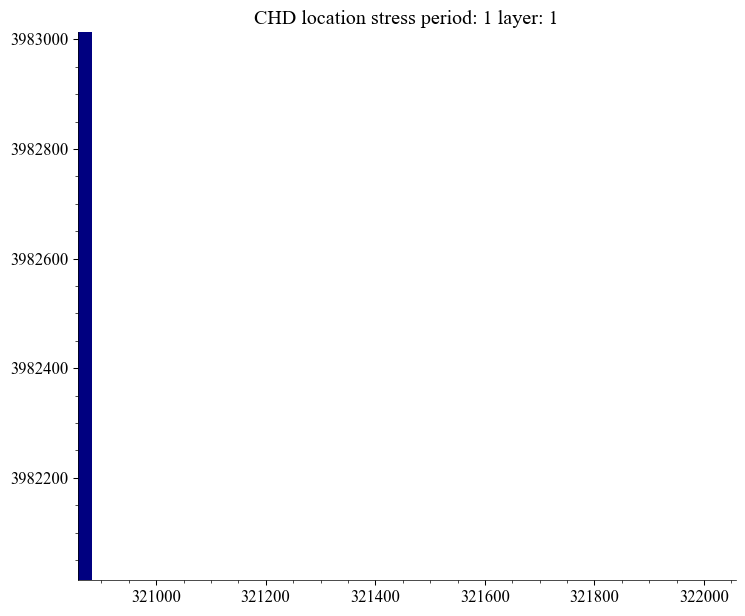

In [47]:
# Plot the constant-head package settings for the first stress period
mf.chd.stress_period_data.plot(kper=0, colorbar=True) 

### HOB - HEAD OBSERVATIONS

In [48]:
# Show observation point data
d_dict['Observations']

,Name,Elev[m],Karst,geometry
0,obs1,5.0,No,POINT (320957.926 3982232.215)
1,obs2,5.0,No,POINT (321063.706 3982515.272)
2,obs3,5.0,Matrix,POINT (321291.971 3982605.634)
3,obs4,5.0,Conduit,POINT (321385.531 3982449.929)
4,obs5,5.0,Matrix,POINT (321640.840 3982461.270)


In [49]:
# Define the time series for the observation points
time = mf.dis.get_totim()

In [50]:
# Zero values for all time steps - no observed heads
# Create a dictionary with the observation points as keys with the time series and the observed values 
data_obs = {}
for name in d_dict['Observations']['Name']:
    data_obs[name] = [[t, 0] for t in time]
# Show the dictionary
data_obs

{'obs1': [[3600.0, 0],
  [7200.0, 0],
  [10800.0, 0],
  [14400.0, 0],
  [18000.0, 0],
  [21600.0, 0],
  [25200.0, 0],
  [28800.0, 0],
  [32400.0, 0],
  [36000.0, 0],
  [39600.0, 0],
  [43200.0, 0],
  [46800.0, 0],
  [50400.0, 0],
  [54000.0, 0],
  [57600.0, 0],
  [61200.0, 0],
  [64800.0, 0],
  [68400.0, 0],
  [72000.0, 0],
  [75600.0, 0],
  [79200.0, 0],
  [82800.0, 0],
  [86400.0, 0],
  [90000.0, 0],
  [93600.0, 0],
  [97200.0, 0],
  [100800.0, 0],
  [104400.0, 0],
  [108000.0, 0],
  [111600.0, 0],
  [115200.0, 0],
  [118800.0, 0],
  [122400.0, 0],
  [126000.0, 0],
  [129600.0, 0],
  [133200.0, 0],
  [136800.0, 0],
  [140400.0, 0],
  [144000.0, 0],
  [147600.0, 0],
  [151200.0, 0],
  [154800.0, 0],
  [158400.0, 0],
  [162000.0, 0],
  [165600.0, 0],
  [169200.0, 0],
  [172800.0, 0]],
 'obs2': [[3600.0, 0],
  [7200.0, 0],
  [10800.0, 0],
  [14400.0, 0],
  [18000.0, 0],
  [21600.0, 0],
  [25200.0, 0],
  [28800.0, 0],
  [32400.0, 0],
  [36000.0, 0],
  [39600.0, 0],
  [43200.0, 0],
  [468

In [51]:
# Define the layers of the observation points (layer 0 = top layer)
lay_obs = [0] * len(d_dict['Observations'])
lay_obs

[0, 0, 0, 0, 0]

In [52]:
# Define the x and y coordinates of the cell centers of the observation points
xcenter = mf.modelgrid.xcellcenters
ycenter = mf.modelgrid.ycellcenters
print(xcenter)
print(ycenter)

[[320869.838297 320894.838297 320919.838297 ... 321994.838297
  322019.838297 322044.838297]
 [320869.838297 320894.838297 320919.838297 ... 321994.838297
  322019.838297 322044.838297]
 [320869.838297 320894.838297 320919.838297 ... 321994.838297
  322019.838297 322044.838297]
 ...
 [320869.838297 320894.838297 320919.838297 ... 321994.838297
  322019.838297 322044.838297]
 [320869.838297 320894.838297 320919.838297 ... 321994.838297
  322019.838297 322044.838297]
 [320869.838297 320894.838297 320919.838297 ... 321994.838297
  322019.838297 322044.838297]]
[[3983000.31168534 3983000.31168534 3983000.31168534 ... 3983000.31168534
  3983000.31168534 3983000.31168534]
 [3982975.31168534 3982975.31168534 3982975.31168534 ... 3982975.31168534
  3982975.31168534 3982975.31168534]
 [3982950.31168534 3982950.31168534 3982950.31168534 ... 3982950.31168534
  3982950.31168534 3982950.31168534]
 ...
 [3982075.31168534 3982075.31168534 3982075.31168534 ... 3982075.31168534
  3982075.31168534 39820

In [53]:
# Calculate offset of observations from the x and y cellcenter
# save the information in a dictionary
data_offset = {}
for i in d_dict['Observations'].index: 
    print(i)
    print(d_dict['Observations']['Name'][i], ':')
    # Get the name of the observation point
    name = d_dict['Observations']['Name'][i]
    # Get the x and y coordinates of the observation point
    x,y = d_dict[f'Observations-{i+1:03d}-ix']['ixshapes'][0].xy
    x = x[0]
    y = y[0]
    # Get the row and column of the observation point
    row, col = d_dict[f'Observations-{i+1:03d}-ix-cid'][0]
    # Print the information
    print('xcord:', x)
    print('ycord:', y)
    print('xcellcenter:', xcenter[row][col])
    print('ycellcenter:', ycenter[row][col])
    # Get the offset of the observation point from the cell center
    x_off = (x - xcenter[row][col])/(celGlo)
    y_off = (y - ycenter[row][col])/(celGlo)
    print('x proportion cell:', x_off)
    print('y proportion cell:', y_off)
    # Save the information in the dictionary
    data_offset[f'name_{i+1}'] = name.replace(' ','_')
    data_offset[f'x_{i+1}'] = x
    data_offset[f'y_{i+1}'] = y
    data_offset[f'x_off_{i+1}'] = x_off
    data_offset[f'y_off_{i+1}'] = y_off
    data_offset[f'row_{i+1}'] = row
    data_offset[f'col_{i+1}'] = col

0
obs1 :
xcord: 320957.9263425829
ycord: 3982232.214948685
xcellcenter: 320969.838297
ycellcenter: 3982225.311685344
x proportion cell: -0.4764781766827218
y proportion cell: 0.2761305336281657
1
obs2 :
xcord: 321063.7062214858
ycord: 3982515.2715854477
xcellcenter: 321069.838297
ycellcenter: 3982525.311685344
x proportion cell: -0.24528302056714893
y proportion cell: -0.401603995859623
2
obs3 :
xcord: 321291.9708371067
ycord: 3982605.633509103
xcellcenter: 321294.838297
ycellcenter: 3982600.311685344
x proportion cell: -0.11469839573139325
y proportion cell: 0.21287295036017895
3
obs4 :
xcord: 321385.53107485216
ycord: 3982449.929299007
xcellcenter: 321394.838297
ycellcenter: 3982450.311685344
x proportion cell: -0.37228888591285797
y proportion cell: -0.01529545348137617
4
obs5 :
xcord: 321640.8397698257
ycord: 3982461.270220582
xcellcenter: 321644.838297
ycellcenter: 3982450.311685344
x proportion cell: -0.15994108697166667
y proportion cell: 0.4383414095081389


In [54]:
# Create a dictionary with the head observations
hob_obs = {}
# Create for each observation point a head observation object and save it in the dictionary
for i in d_dict['Observations'].index: 
    hob_obs[f'obs_{i+1}'] = flopy.modflow.mfhob.HeadObservation(
        mf, 
        layer =lay_obs[i], # Starts by layer 0
        row = data_offset[f'row_{i+1}'], 
        column = data_offset[f'col_{i+1}'],
        coff = data_offset[f'x_off_{i+1}'],
        roff = data_offset[f'y_off_{i+1}'],
        obsname = data_offset[f'name_{i+1}'], 
        names = [f'{data_offset[f"name_{i+1}"]}_{j+1}' for j in range(mf.dis.nper)],
        time_series_data = data_obs[f'obs{i+1}'])

#### Write HOBS file

In [55]:
# Put the head observation objects in a list
obs_data = []
for obs in hob_obs.values():
    obs_data.append(obs)
obs_data

In [56]:
# Define the head observation package
hob = flopy.modflow.ModflowHob(mf, hobdry=-9999., obs_data=obs_data)

adding Package:  HOB


### PCG - Preconditioned Conjugate-Gradient Package (Solver)

In [57]:
'''PCG - SOLVER'''
""" solver tolerances """
# Max number of outer iterations 
mxiter = 2000
# Number of inner iterations
iter1 = 2000
# Modflow general tolerance
mftol = 2e-4
# Modflow relaxation parameter
mfrelax = 0.99
# Flag for matrix conditioning method, 1=modified incomplete cholesky
npcond = 1
# Flag for active cell surrounded by dry cells. 0=converts to dry, not0=converts only if hcof=0
ihcofadd = 9999
#  Relaxation parameter with npcond=1 
relax = mfrelax
# Estimate of upper bound
nbpol = 2
# Printout interval
iprpcg = 5
# Print flag
mutpcg = 0
#damping factor
damppcg = 0.99


In [58]:
# Define the preconditioned conjugate gradient package settings
pcg = flopy.modflow.ModflowPcg(mf, mxiter=mxiter, iter1=iter1, npcond=npcond,
                               hclose=mftol, rclose=mftol, 
                               relax=relax, nbpol=nbpol, iprpcg=iprpcg, mutpcg=mutpcg, damp=damppcg,
                               ihcofadd=ihcofadd)

adding Package:  PCG


### OC - Output Control

In [59]:
# Create output control file using dictionary
per_dict = {(kper,0): ['print head', 'save head', 'save budget'] for kper in range(mf.dis.nper)}

In [60]:
# Define the output control settings
oc = flopy.modflow.ModflowOc(mf, stress_period_data=per_dict)

Adding mf_syn.hds (unit=51) to the output list.
adding Package:  OC


## Write MODFLOW input files

In [61]:
# Write the MODFLOW model input files
mf.write_input()


Writing packages:
   Package:  DIS
   Package:  BAS6
   Package:  LPF
   Package:  RCH
   Package:  CHD
   Package:  HOB
   Package:  PCG
   Package:  OC
 


In [62]:
# Check the MODFLOW model input files for errors and warnings
mf.check()


mf_syn MODEL DATA VALIDATION SUMMARY:
  3 Warnings:
    RCH package: Mean R/T ratio < checker warning threshold of 2e-08 for 17 stress periods
    RCH package: Mean R/T ratio > checker warning threshold of 0.0002 for 1 stress periods
    RCH package: Variable NRCHOP set to value other than 3

  Checks that passed:
    Unit number conflicts
    Compatible solver package
    DIS package: zero or negative thickness
    DIS package: thin cells (less than checker threshold of 1.0)
    DIS package: nan values in top array
    DIS package: nan values in bottom array
    BAS6 package: isolated cells in ibound array
    BAS6 package: Not a number
    LPF package: zero or negative horizontal hydraulic conductivity values
    LPF package: zero or negative vertical hydraulic conductivity values
    LPF package: negative horizontal anisotropy values
    LPF package: horizontal hydraulic conductivity values below checker threshold of 1e-11
    LPF package: horizontal hydraulic conductivity values a

## Create CFP Input Files

In [63]:
# 1 = conduit node location, 0 = pure matrix cell without conduit node
# Create an array with zeros (pure matrix cells)
network = np.zeros((mf.dis.nrow, mf.dis.ncol))
# Replace the corresponding cells with ones (conduit cells)
for i in range(d_dict['Conduits'].shape[0]):
    for row,col in d_dict[f'Conduits-{i+1:03d}-ix-cid']:
        network[row,col] = 1 # Location of conduit node
# Show the array
network

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [64]:
# Define elevations for the network
elevations = network * 5
# Show the array
elevations

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [65]:
# Validate the network
validator = cfpy.preprocessing.GeneralValidator(network=network,
                                                elevations=elevations, flopymodel=mf)
valid_network = validator.validate_network()
# Create the necessary nbr file
validator.generate_nbr( path = model_ws,
    nplanes = 1)


Always visually check the validated network for structuralcorrectness! 
i.e., whether branches are correctly isolated or ifthey got connected during processing.


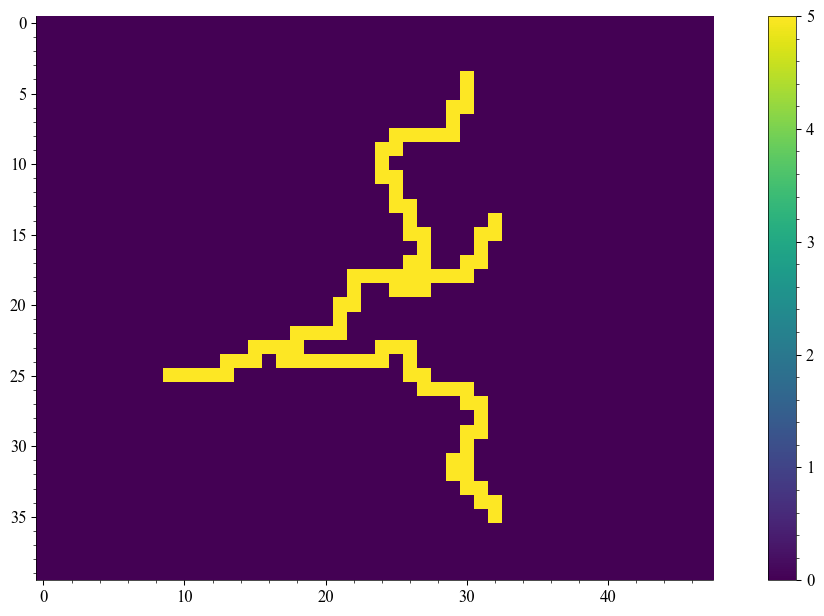

In [66]:
# Plot the valid network
im = plt.imshow(valid_network)
plt.colorbar(im, shrink=1.)

### CFPy - generate NBR input

In [67]:
""" initialize nbr module """
# NOTE: make sure there is only 1 .nbr-file in the active domain!!
# If no or multiple .nbr-files are present, CFPy throws an error
# Change the current working directory to the model folder
os.chdir(model_ws)
# Read the .nbr-file
nbr = cfpy.nbr()
# Read model layer/node and conduit layer/node elevations
# Bot_elev has shape (n_layers, n_rows, n_cols)
# Cond_elev has shape (n_conduit_layers, n_rows, n_cols)
# Function looks for an .nbr-file, if none or more than one file is found, an error is raised
# Make sure to only have one .nbr-file in the working directory
bot_elev, cond_elev = nbr.nbr_read()
# Create nbr-data
nbr_data = nbr.nbr(bot_elev, cond_elev)


Elapsed time (.nbr file read): 0.01 s
Elapsed time (write nbr data): 0.04 s


In [68]:
# Show the nbr data
nbr_data

([1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95],
 [[1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1

In [69]:
# nbr-data contains:
#     0: node numbers
#     1: plane numbers
#     2: node locations
#     3: conduit locations
#     4: node neighbors
#     5: tube numbers
#     6: tube pairs
#     7: tube neighbors

# nbr data: locations in grid are indexed differently:
#     MODFLOW: (LAY, ROW, COL)
#     CFPy: (COL, ROW, LAY)

### CFPy parametrization of conduits/CFP Mode 1

In [70]:
""" Pipe Flow Parameter """
# Make pipe parametrization lists
# Get pipe numbers
p_num = nbr_data[5]
# Parametrization of all k pipes
# Assuming same characteristics for all pipes
# Lists for all conduit parametrization can be accessed individually to make differently parametrized pipes
# e.g., p_diameter[13] = 0.45

# Global parameters
""" Hydraulic characteristics """
# Pipe diameter [L]
diameter = d_dict['Par_syn-i']['Value']['Pipe diameter']
# Pipe tortuosity [-]
tortuosity = d_dict['Par_syn-i']['Value']['Pipe tortuosity']
# Roughness height [L]
rheight = d_dict['Par_syn-i']['Value']['Roughness height']
# Lower and higher critical reynolds number
lcritrey = d_dict['Par_syn-i']['Value']['Lower critical reynolds number']
hcritrey = d_dict['Par_syn-i']['Value']['Higher critical reynolds number']
# NOTE: Create lists with the global parameters
# Diameter
p_diameter = np.ones(len(p_num)) * diameter
p_diameter = p_diameter.tolist()
# Tortuosity
p_tortuosity = np.ones(len(p_num)) * tortuosity
p_tortuosity = p_tortuosity.tolist()
# Roughness height
p_rheight = np.ones(len(p_num)) * rheight
p_rheight = p_rheight.tolist()
# Lower critical reynolds number
p_lcritrey = np.ones(len(p_num)) * lcritrey
p_lcritrey = p_lcritrey.tolist()
# Higher critical reynolds number
p_hcritrey = np.ones(len(p_num)) * hcritrey
p_hcritrey = p_hcritrey.tolist()
# Summarize all data in a 2D-array
pipe_data = [p_num, p_diameter, p_tortuosity, p_rheight,
             p_lcritrey, p_hcritrey]

In [71]:
""" KEX Data """
# Conduit wall conductivity [L²/T]
k_exchange = d_dict['Par_syn-i']['Value']['Conduit wall conductivity karst']
# Define the kex data as a list
kex_data = [nbr_data[0],
            np.ones(len(nbr_data[0])) * k_exchange]
# Define conduit wall conductivity for alluvial system at the outlet (surbsurface spring)
for i in range(d_dict['Outlets'].shape[0]):
    for col,row in d_dict[f'Outlets-{i+1:03d}-ix-cid']: #col, row
        pos = nbr_data[2].index([row+1,col+1,1]) # col, row, lay
        kex_data[1][pos] = d_dict['Par_syn-i']['Value']['Conduit wall conductivity alluvial']

In [72]:
# Show the kex data
kex_data[1]

array([0.000275, 0.000275, 0.000275, 0.000275, 0.000275, 0.000275,
       0.000275, 0.000275, 0.000275, 0.000275, 0.000275, 0.000275,
       0.000275, 0.000275, 0.000275, 0.000275, 0.000275, 0.000275,
       0.000275, 0.000275, 0.000275, 0.000275, 0.000275, 0.000275,
       0.000275, 0.000275, 0.000275, 0.000275, 0.000275, 0.000275,
       0.000275, 0.000275, 0.000275, 0.000275, 0.000275, 0.000275,
       0.000275, 0.000275, 0.000275, 0.000275, 0.000275, 0.000275,
       0.000275, 0.000275, 0.000275, 0.000275, 0.000275, 0.000275,
       0.000275, 0.000275, 0.000275, 0.000275, 0.000275, 0.000275,
       0.000275, 0.000275, 0.000275, 0.000275, 0.000275, 0.000275,
       0.000275, 0.000275, 0.000275, 0.000275, 0.000275, 0.000275,
       0.000275, 0.000275, 0.000275, 0.085   , 0.000275, 0.000275,
       0.000275, 0.000275, 0.000275, 0.000275, 0.000275, 0.000275,
       0.000275, 0.000275, 0.000275, 0.000275, 0.000275, 0.000275,
       0.000275, 0.000275, 0.000275, 0.000275, 0.000275, 0.000

In [73]:
""" Node Heads """
# Defined head at outlets node [L]
# If head > 0: fixed head
# If head == -1: calculated head
n_head = np.ones((len(nbr_data[0]))) * -1
n_head = n_head.tolist()
# Define the node head data as a list
node_data = [nbr_data[0], n_head]

In [74]:
# Show the node data
node_data

[[1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95],
 [-1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0

In [75]:
""" CADS Data """
# Conduit associated storage (CADS), assign width of the storage [L]
cad = d_dict['Par_syn-i']['Value']['Conduit associated storage (width)']
# Initially set no CADS for all nodes
cads_data = np.zeros((len(nbr_data[0])))
cads_data = cads_data.tolist()


In [76]:
""" Solver tolerances """
# CFP general tolerance
cfptol = 1e-9
# CFP relaxation parameter
cfprelax = 0.99

### Conduit Recharge

In [77]:
""" CRCH """
# p_crch is list of length (n_nodes) specifying the direct recharge fraction for each node
# Initially set p_crch to 0 for all nodes (no direct recharge)
p_crch = np.zeros((len(nbr_data[0]))).tolist()

for i in range(d_dict['Inlets'].shape[0]):
    for col,row in d_dict[f'Inlets-{i+1:03d}-ix-cid']: #col, row
        # Get the position of the inlets in the nbr_data
        pos = nbr_data[2].index([row+1,col+1,1]) # col, row, lay
        # Define the CAD value for the inlet nodes
        cads_data[pos] = cad

        p_crch[pos] = d_dict['gdf_inlets']['gwr_catchment'][i]

crch = cfpy.crch(iflag_crch = 1, 
                 nper = mf.dis.nper, 
                 node_numbers = nbr_data[0], 
                 p_crch = p_crch)
# create list of strings
crch = crch.crch()

In [78]:
# Show the p_crch data
p_crch

[77.5264,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 81.9552,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 80.152]

In [79]:
# Show the CADS data
cads_data

[0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5]

In [80]:
""" Instantiate CFP """
cfp = cfpy.cfp(mode = 1,
                nnodes = len(nbr_data[0]), 
                npipes = len(nbr_data[5]), 
                nlay = mf.dis.nlay,
                nbr_data = nbr_data, 
                geoheight = cond_elev, 
                sa_exchange = 0, 
                epsilon = cfptol,
                niter = 2000, 
                relax = cfprelax, 
                p_nr = 0, 
                cond_data = pipe_data, 
                n_head = node_data, 
                k_exchange = kex_data, 
                ncl = 0, 
                cl = 0, 
                ltemp = 10,
                condl_data = 0,
                cads = cads_data)

 # create list of strings
cfp = cfp.cfp()

### Conduit output control

In [81]:
 """ COC """
# Define the output control file settings
coc = cfpy.coc(nnodes = len(nbr_data[0]),
                node_numbers = nbr_data[0],
                n_nts = 1,
                npipes = len(nbr_data[5]), 
                pipe_numbers = nbr_data[5],
                t_nts = 1)

coc = coc.coc()

## Write CFP input files

In [82]:
""" Write Input """
# Write input files to the current directory
input_files = cfpy.write_input(modelname = modelname,
                                data_strings = [coc, crch, cfp],
                                file_extensions = ['coc', 'crch', 'cfp'])

# write CFP input files
input_files.write_input()

In [83]:
""" Update nam file """
# Update the nam file with the additional files
nam = cfpy.update_nam(modelname = modelname,
                        mode = 1,
                        cfp_unit_num = 52,
                        crch_unit_num = 53,
                        coc_unit_num = 54)

# update existing .nam file
nam.update_nam()


# Simulation run

In [84]:
# Run the simulation
success, buff = mf.run_model(silent=False)

FloPy is using the following executable to run the model: ..\..\..\..\..\..\..\..\WRDAPP\CFPv2MAX.exe



                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                   Version 1.9.25 06/04/2013 CFPv2 HTM/STM/UMT-LNK/CADS
THIS IS A RESEARCH VERSION OF CFP MODE 1 FOR TEST PURPOSES WITHOUT ANY WARRANTY REGARDING CORRECTNESS
CONTACT: THOMAS.REIMANN@TU-DRESDEN.DE AND BSHOEMAK@USGS.GOV

 Using NAME file: mf_syn.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2023/12/30 16:54:48

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:     2    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:     3    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:     4    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:     5    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:     6    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:     7    Time step:     1    Ground-Water 

# Postprocessing

### Head map and cross section

In [85]:
# Extract head and flow budget
# Define the names
hds_name = modelname + ".hds"
cbc_name = modelname + ".cbc"
# Extract the head and cell budget objects
hdobj = flopy.utils.HeadFile(os.path.join(os.path.join(
        main_dir, '02_Model', modelname, hds_name)))
cbb = flopy.utils.CellBudgetFile(os.path.join(os.path.join(
        main_dir, '02_Model', modelname, cbc_name)))

In [86]:
# Define the settings for the plot
settings = {'cmap': 'viridis',
            'cmap_show': True,
            'vmin': 0,
            'vmax': 50,
            'cmap_alpha': 0.5,
            'cbar_show': True,
            'cbar_label': 'Head [m]',
            'masked_values': [-1.e+20, -2.e+20],
            'cbar_shrink': 0.8,
            'contour_colors' : 'whitesmoke',
            'cbar_rotation': 90,
            'cbar_labelpad': 10,
            'contourlabel_format': '%.1fm',
            'normalize' : True,
            'vector_alpha': 1,
            'vector_color': 'navy',
            'vector_scale': 55,
            'istep' : 2,
            'jstep' : 2,
            'hstep' : 2,}
# Define the levels for the contour plot
levels = np.linspace(settings['vmin'], settings['vmax'], 
                     (settings['vmax'] - settings['vmin']) + 1)
# Define the column and row for the cross section
col = 20
row = 20

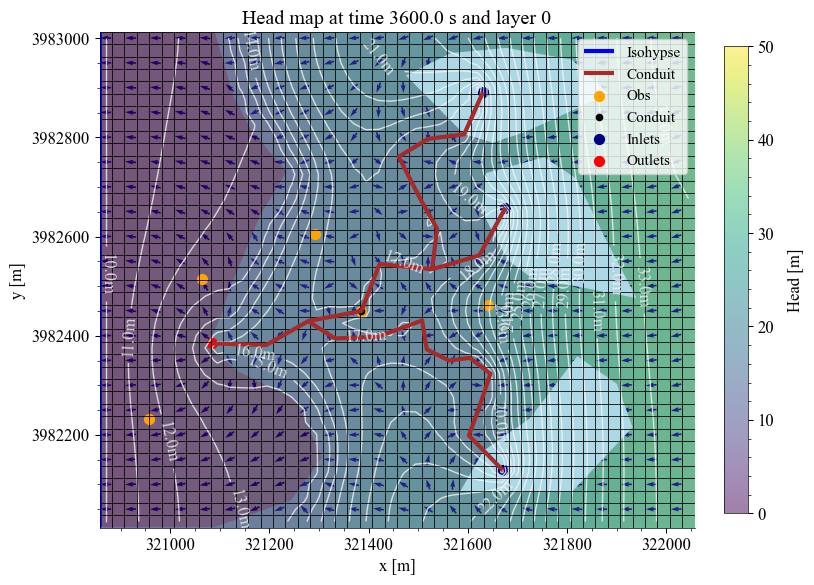

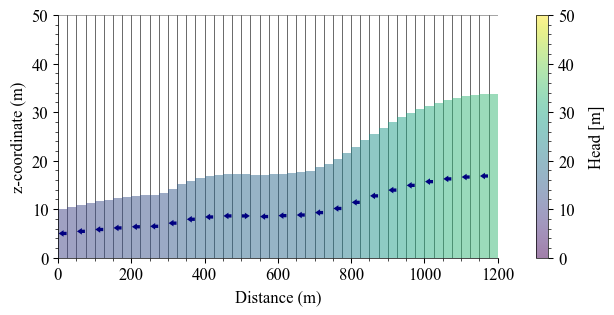

In [87]:
# Plot the model
mf_plot = plot_model(model = mf, layer = 0, time = mf.dis.get_totim()[0],
                     hdobj = hdobj, cbb = cbb, settings = settings)
# Create the figure
fig, ax = plt.subplots(figsize=(8,6))
# Plot the head map
mf_plot.head_map(ax=ax)
# Plot the contour map
mf_plot.contour_map(ax=ax, levels = levels)
# Plot the vector map
mf_plot.vector_map(ax=ax, vec = 'specific')
# Plot the system features
plot_system(ax = ax)
# Plot the cross section
fig, ax = plt.subplots(figsize=(6,3), nrows= 1, ncols =1, sharex=False)
mf_plot.crosssection_map(ax=ax, line={'row': row})

### Global Water Budget

### Matrix

In [88]:
# Set the time unit 
timeunit = 'seconds'
# Define the budget key to search for the input and outputs for each stress period
budgetkey="VOLUMETRIC BUDGET FOR ENTIRE MODEL"
# Define a start datetime
start_datetime = "1-1-2020" # datetime.now().strftime('%m/%d/%Y') 

In [92]:
# Read the listing file to extract the global water budget
# Define Path and folder names
path = os.path.join(main_dir, '02_model')
foldernames = ['mf_syn']
# Global water budget dictionary
mfl, gwb_dict = read_gwb(modelname, budgetkey, timeunit, 
                         path, foldernames, start_datetime)

c:\GW_GitHub\TUD_GW_MOD\content\02_MSc_Thesis_Karst\01_Synthetic_Example\topic_func\postprocess.py:953: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  groups = df_vol.groupby(lambda x: x.split("_")[-1], axis=1).groups
c:\GW_GitHub\TUD_GW_MOD\content\02_MSc_Thesis_Karst\01_Synthetic_Example\topic_func\postprocess.py:957: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  groups = df_flux.groupby(lambda x: x.split("_")[-1], axis=1).groups


In [96]:
# Show the global water budget dictionary keys
gwb_dict.keys()

dict_keys(['df_vol_in_mf_syn', 'df_flux_in_mf_syn', 'df_vol_out_mf_syn', 'df_flux_out_mf_syn', 'df_vol_per_mf_syn', 'df_flux_per_mf_syn', 'df_vol_delta_mf_syn', 'df_flux_delta_mf_syn'])

In [ ]:
# Rename columns of the global water budget dictionary
new = {'RIVER_LEAKAGE': 'River'}
for key, df in gwb_dict.items():
     print(key)
     gwb_dict[key], names = rename_gwb_col_df(df = df, new = new)
     # Delete the column "Model" and "TOTAL" (if exists)
     try:
          gwb_dict[key].drop('TOTAL', axis=1, inplace=True)
          gwb_dict[key].drop('Model', axis=1, inplace=True)
     except:
          pass

df_vol_in_mf_syn
df_flux_in_mf_syn
df_vol_out_mf_syn
df_flux_out_mf_syn
df_vol_per_mf_syn
df_flux_per_mf_syn
df_vol_delta_mf_syn
df_flux_delta_mf_syn


### Plot the global water budget

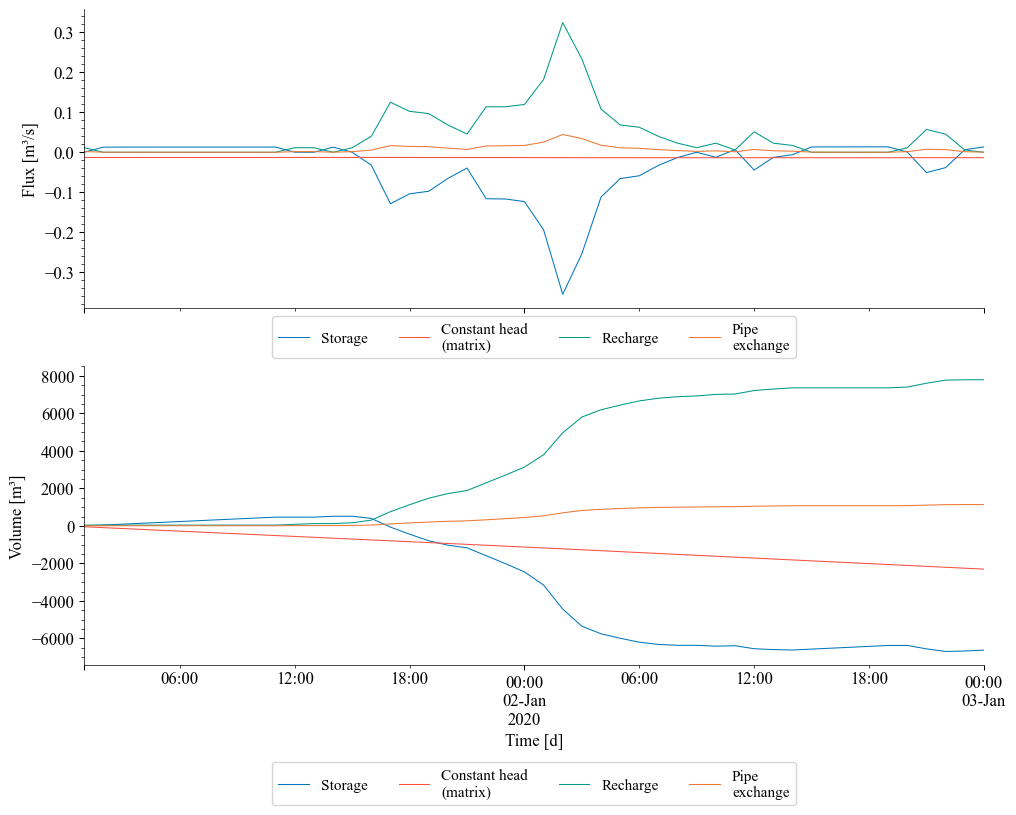

In [ ]:
# Create a figure with two subplots for the fluxes and volumes
fig, ax = plt.subplots(figsize=(10,8), nrows= 2, ncols =1, sharex=True)
# Plot the fluxes
gwb_dict['df_flux_delta_mf_syn'].plot(ax=ax[0])
# Define the y-axis label
ax[0].set_ylabel('Flux [m³/s]')
# Define the legend settings of the first subplot
ax[0].legend(bbox_to_anchor=(0.5, -0.), ncol=6, loc='upper center')
# Plot the volumes
gwb_dict['df_vol_delta_mf_syn'].plot(ax=ax[1])
# Define the y-axis label
ax[1].set_ylabel('Volume [m³]')
# Define the x-axis label
plt.xlabel('Time [d]')
# Define the legend settings of the second subplot
ax[1].legend(bbox_to_anchor=(0.5, -0.3), ncol=6, loc='upper center')


### Plot the percentage discrepancy

Text(0.5, 0, 'Time [d]')

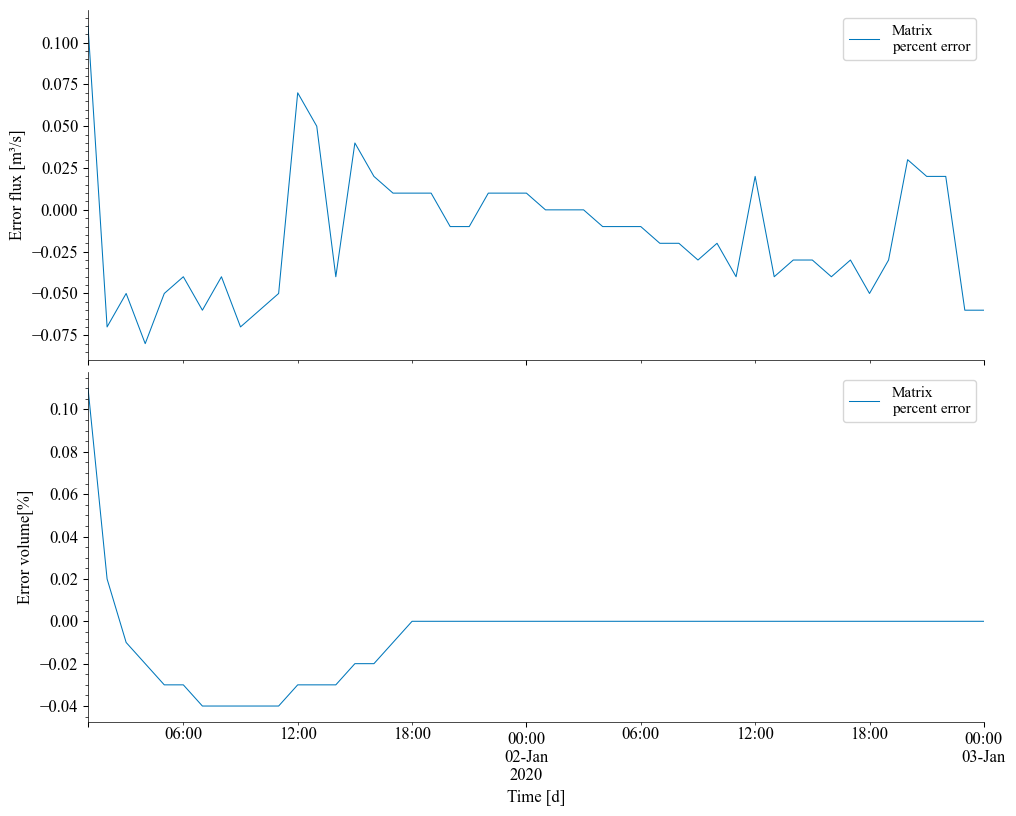

In [ ]:
# Create a figure with two subplots for the errors of fluxes and volumes
fig, ax = plt.subplots(figsize=(10,8), nrows= 2, ncols =1, sharex=True)
# Plot the error of the fluxes
gwb_dict['df_flux_per_mf_syn'].plot(ax=ax[0])
# Define the y-axis label
ax[0].set_ylabel('Error flux [m³/s]')
# Plot the error of the volumes
gwb_dict['df_vol_per_mf_syn'].plot(ax=ax[1])
# Define the y-axis and x-axis label
plt.ylabel('Error volume[%]')
plt.xlabel('Time [d]')

## Conduit system

In [97]:
# Replace the string in the listing file to search for the water budget of the conduit system

# Open the input file and read its contents
input_file = "{}.list".format(modelname)
output_file = "{}.list".format(modelname)
with open(input_file, 'r') as file:
    text = file.read()
# Define the specific string to be replaced and the replacement string
string_to_replace = '  BUDGET OF THE PIPE SYSTEM OF TIMESTEP'
replacement_string = 'BUDGET OF THE PIPE SYSTEM  AT END OF TIME STEP'
# Perform the replacement
modified_text = text.replace(string_to_replace, replacement_string)
# Open the output file and write the modified text
with open(output_file, 'w') as file:
    file.write(modified_text)
print("File saved as:", output_file)

File saved as: mf_syn.list


In [98]:
# Set the time unit 
timeunit = 'seconds'
# Define the budget key to search for the input and outputs for each stress period
budgetkey= 'BUDGET OF THE PIPE SYSTEM'
# Define a start datetime
start_datetime = "1-1-2020" # datetime.now().strftime('%m/%d/%Y') 

In [99]:
# Read the listing file to extract the global water budget
# Define Path and folder names
path = os.path.join(main_dir, '02_model')
# Global water budget dictionary of the conduit system
foldernames = ['mf_syn']
mfl, gwb_dict = read_gwb(modelname, budgetkey, timeunit, 
                         path, foldernames, start_datetime)

c:\GW_GitHub\TUD_GW_MOD\content\02_MSc_Thesis_Karst\01_Synthetic_Example\topic_func\postprocess.py:953: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  groups = df_vol.groupby(lambda x: x.split("_")[-1], axis=1).groups
c:\GW_GitHub\TUD_GW_MOD\content\02_MSc_Thesis_Karst\01_Synthetic_Example\topic_func\postprocess.py:957: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  groups = df_flux.groupby(lambda x: x.split("_")[-1], axis=1).groups
c:\GW_GitHub\TUD_GW_MOD\content\02_MSc_Thesis_Karst\01_Synthetic_Example\topic_func\postprocess.py:1007: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gwb_dict[f"df_vol_out_{foldername}"].drop(
c:\GW_GitHub\TUD_GW_MOD\content\02_MSc_Thesis_Karst\01_S

In [ ]:
# Rename columns of the global water budget dictionary
new = {'RIVER_LEAKAGE': 'River'}
for key, df in gwb_dict.items():
     print(key)
     gwb_dict[key], names = rename_gwb_col_df(df = df, new = new)
     # Delete the column "Model", "TOTAL", "TOTAL_IN" and "CUMULATIVE" (if exists)
     try:
          gwb_dict[key].drop('CUMULATIVE', axis=1, inplace=True)
          gwb_dict[key].drop('TOTAL', axis=1, inplace=True)
          gwb_dict[key].drop('TOTAL_IN', axis=1, inplace=True)
          gwb_dict[key].drop('Model', axis=1, inplace=True)
     except:
          pass

df_vol_in_mf_syn
df_flux_in_mf_syn
df_vol_out_mf_syn
df_flux_out_mf_syn
df_vol_per_mf_syn
df_flux_per_mf_syn
df_vol_delta_mf_syn
df_flux_delta_mf_syn


### Plot the global water budget

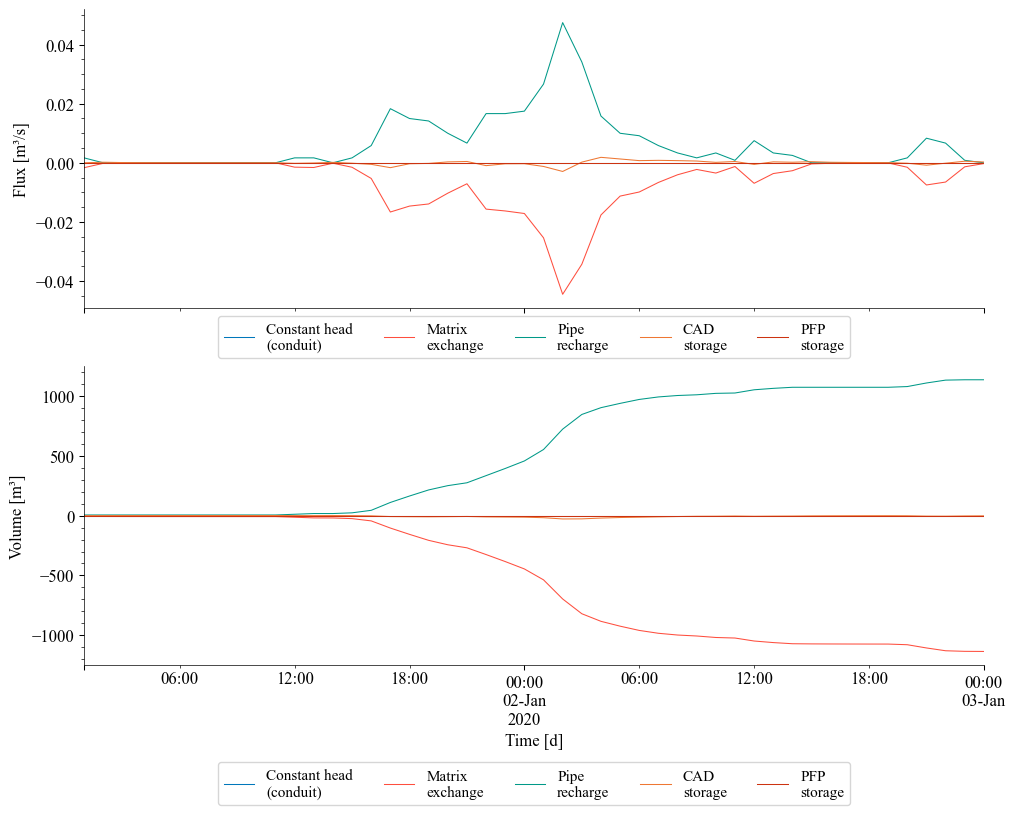

In [ ]:
# Create a figure with two subplots for the fluxes and volumes
fig, ax = plt.subplots(figsize=(10,8), nrows= 2, ncols =1, sharex=True)
# Plot the fluxes
gwb_dict['df_flux_delta_mf_syn'].plot(ax=ax[0])
# Define the y-axis label
ax[0].set_ylabel('Flux [m³/s]')
# Define the legend settings of the first subplot
ax[0].legend(bbox_to_anchor=(0.5, -0.), ncol=6, loc='upper center')
# Plot the volumes
gwb_dict['df_vol_delta_mf_syn'].plot(ax=ax[1])
# Define the y-axis and x-axis label
ax[1].set_ylabel('Volume [m³]')
plt.xlabel('Time [d]')
# Define the legend settings of the second subplot
ax[1].legend(bbox_to_anchor=(0.5, -0.3), ncol=6, loc='upper center')


### Plot the percentage discrepancy

Text(0.5, 0, 'Time [d]')

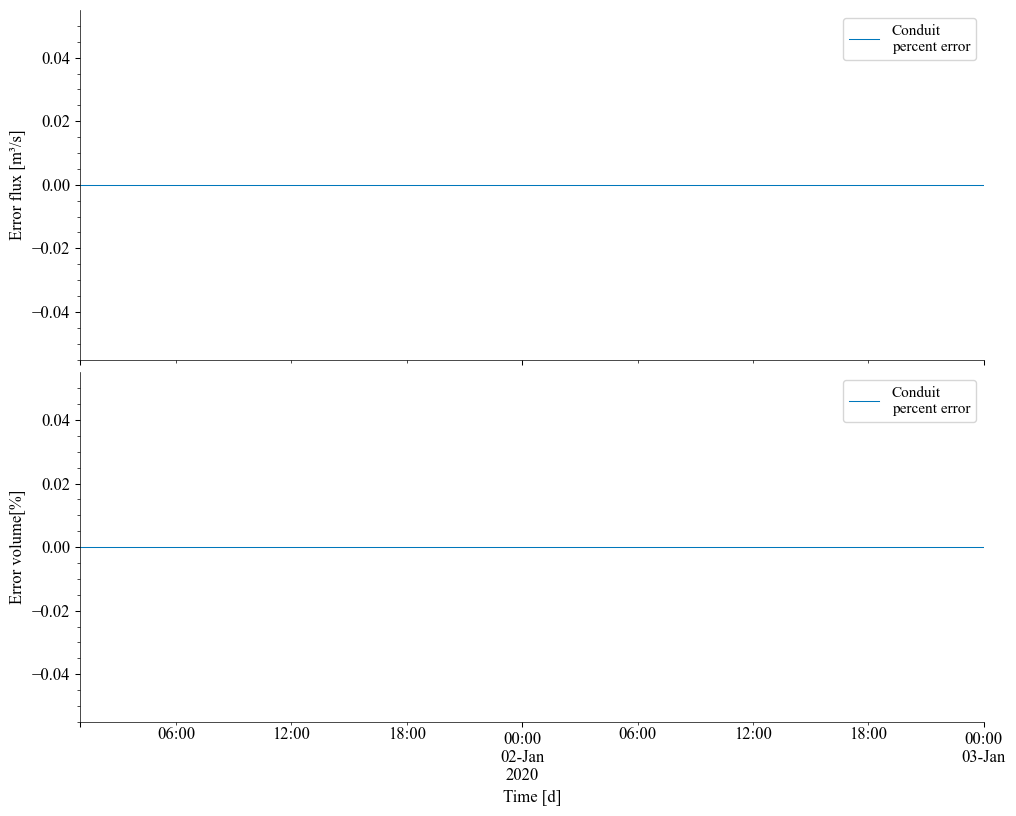

In [ ]:
# Create a figure with two subplots for the errors of fluxes and volumes
fig, ax = plt.subplots(figsize=(10,8), nrows= 2, ncols =1, sharex=True)
# Plot the error of the fluxes
gwb_dict['df_flux_per_mf_syn'].plot(ax=ax[0])
# Define the y-axis label
ax[0].set_ylabel('Error flux [m³/s]')
# Plot the error of the volumes
gwb_dict['df_vol_per_mf_syn'].plot(ax=ax[1])
# Define the y-axis and x-axis label
ax[1].set_ylabel('Error volume[%]')
plt.xlabel('Time [d]')

### Observations

In [100]:
# Observations of HOB package only extract the heads of the matrix 
# Create a hob_out file similar to ModelMuse, which can be used for instance for PEST (automatic calibration)
# Create the hob_out file based on the listing file
hob_out = create_hob_out_file(path_folder = p_folders['02_model_mf_syn'], 
                              filename = modelname)
# Change the datatype of the ''simulated equivalent'' column to float
hob_out['SIMULATED EQUIVALENT'] = hob_out['SIMULATED EQUIVALENT'].astype(float)
# Split the observation name to get the observation point name without timestep number
hob_out['Obs'] = hob_out['OBSERVATION NAME'].str.split('_').str[0]
# Define the time for the observed data
hob_out['time'] = [time for key in hob_obs.keys() for time in hob_obs[f'{key}'].time_series_data['totim']]
# Show the hob_out data with additional information
hob_out

Skipped


,SIMULATED EQUIVALENT,OBSERVED VALUE,OBSERVATION NAME,Obs,time
0,11.555435,0.0,obs1_1,obs1,3600.0
1,11.555281,0.0,obs1_2,obs1,7200.0
2,11.555127,0.0,obs1_3,obs1,10800.0
3,11.554973,0.0,obs1_4,obs1,14400.0
4,11.554819,0.0,obs1_5,obs1,18000.0
...,...,...,...,...,...
235,21.883062,0.0,obs5_44,obs5,158400.0
236,21.884515,0.0,obs5_45,obs5,162000.0
237,21.885605,0.0,obs5_46,obs5,165600.0
238,21.885422,0.0,obs5_47,obs5,169200.0


In [101]:
# Select the steady state values to check that the observed values are correct
levels_ss = hob_out[hob_out['time'] == mf.dis.get_totim()[0]]['SIMULATED EQUIVALENT'].values
# Order levels from lowest to highest
levels_ss.sort()
levels_ss

array([11.55543493, 12.39680739, 16.61906899, 16.94268646, 21.83344894])

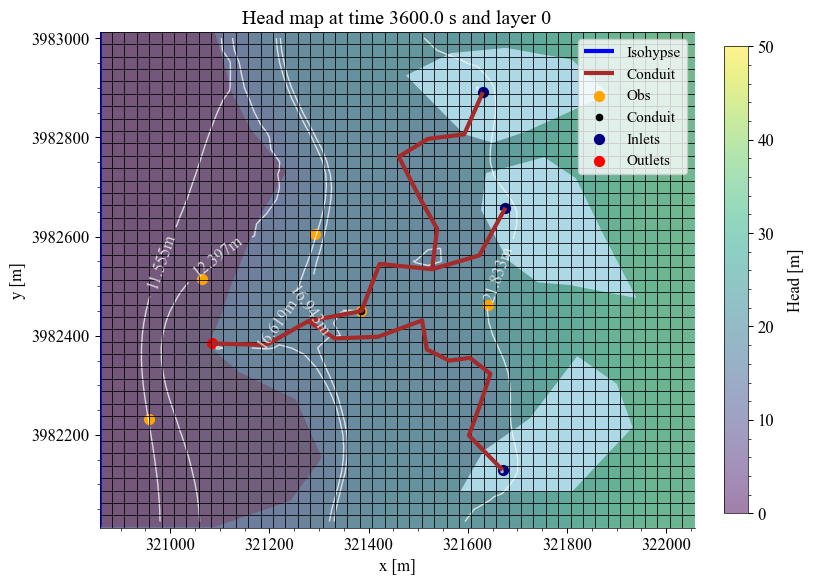

In [ ]:
# Check the observed values for the steady state values
# Contour lines should intersect with the position of the observations
mf_plot = plot_model(model = mf, layer = 0, time = mf.dis.get_totim()[0],
                     hdobj = hdobj, cbb = cbb, settings = settings)
# Create the figure
fig, ax = plt.subplots(figsize=(8,6))
# Plot the head map
mf_plot.head_map(ax=ax)
# Plot the contour map with the steady state values
mf_plot.contour_map(ax=ax, levels = levels_ss, contourlabel_format = '%.3fm')
# Plot the system features
plot_system(ax = ax)


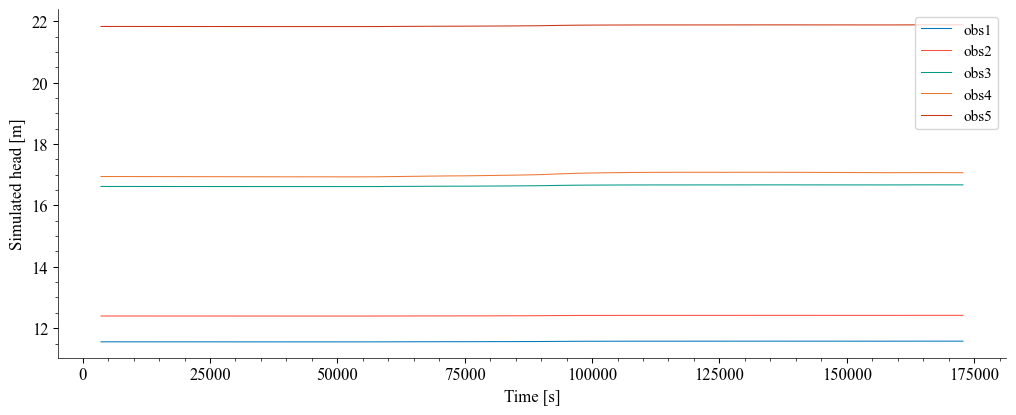

In [ ]:
# Plot the timeseries of the simulated values
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (10,4))
# Plot the simulated values for each observation point
for i in hob_out['Obs'].unique():
    
    x = np.array(hob_out[hob_out['Obs']==i]['time'])
    y = np.array(hob_out[hob_out['Obs']==i]['SIMULATED EQUIVALENT'])
    plt.plot(x,y,label = i)
# Define the labels and legend
plt.xlabel('Time [s]')
plt.ylabel('Simulated head [m]')
plt.legend()

In [ ]:
# Observation 4 is the only one that is located in a conduit 
hob_out[hob_out['Obs']=='obs4']['SIMULATED EQUIVALENT']

144    16.942686
145    16.941974
146    16.941131
147    16.940213
148    16.939248
149    16.938255
150    16.937250
151    16.936238
152    16.935229
153    16.934224
154    16.933225
155    16.932950
156    16.932816
157    16.932052
158    16.931931
159    16.933705
160    16.941272
161    16.948615
162    16.956058
163    16.961917
164    16.966120
165    16.974234
166    16.982863
167    16.992125
168    17.005560
169    17.028826
170    17.048417
171    17.060233
172    17.068144
173    17.074349
174    17.078160
175    17.079984
176    17.080295
177    17.080679
178    17.079697
179    17.081205
180    17.081200
181    17.080666
182    17.078887
183    17.076814
184    17.074565
185    17.072213
186    17.069803
187    17.068086
188    17.069378
189    17.070563
190    17.069473
191    17.067726
Name: SIMULATED EQUIVALENT, dtype: float64

In [ ]:
'''CFPy utilities for node and tube related data'''    
# Search for the node where the observation 4 is located       
fr = cfpy.postprocessing.FileReader(modelname)  
    
node_data_obs = []

for col,row in d_dict['Observations-004-ix-cid']: #col, row
        pos = nbr_data[2].index([row+1,col+1,1])  #col, row, lay
        # Read the node of the observation point
        node_df_obs = fr.read_output(node_num=pos) 
        node_data_obs.append(node_df_obs)

# Here the values of the cellcenter position are extracted --> Small deviations between observation and node_data_obs [Matrix Head [L]]
# Show the data of that Node
node_data_obs

[(    Node#  Node Head [L]  Matrix Head [L]  Exchange [L3 T-1]  \
  0      49       16.86899         16.93621          -0.000018   
  1      49       16.84345         16.93550          -0.000025   
  2      49       16.83340         16.93465          -0.000028   
  3      49       16.82702         16.93373          -0.000029   
  4      49       16.82263         16.93276          -0.000030   
  5      49       16.81955         16.93177          -0.000031   
  6      49       16.81741         16.93076          -0.000031   
  7      49       16.81583         16.92974          -0.000031   
  8      49       16.81471         16.92873          -0.000031   
  9      49       16.81382         16.92772          -0.000031   
  10     49       16.81309         16.92672          -0.000031   
  11     49       16.83813         16.92644          -0.000024   
  12     49       16.84774         16.92631          -0.000022   
  13     49       16.82808         16.92554          -0.000027   
  14     4

In [ ]:
# Show the observed head values
node_data_obs[0][0]['Node Head [L]']

0     16.86899
1     16.84345
2     16.83340
3     16.82702
4     16.82263
5     16.81955
6     16.81741
7     16.81583
8     16.81471
9     16.81382
10    16.81309
11    16.83813
12    16.84774
13    16.82808
14    16.84764
15    16.91852
16    17.14149
17    17.18537
18    17.21392
19    17.17374
20    17.11402
21    17.24453
22    17.29083
23    17.33332
24    17.50098
25    17.89757
26    17.86752
27    17.61812
28    17.44397
29    17.34513
30    17.23336
31    17.13486
32    17.05485
33    17.03491
34    16.97621
35    17.05020
36    17.00762
37    16.98247
38    16.93140
39    16.90806
40    16.89286
41    16.88257
42    16.87546
43    16.89620
44    17.00605
45    17.02505
46    16.95341
47    16.91788
Name: Node Head [L], dtype: float64

In [ ]:
# Replace the simulated values of the matrix for obs4 with the simulated values of the conduit system
old = hob_out.loc[hob_out['Obs']=='obs4']['SIMULATED EQUIVALENT']
new = node_data_obs[0][0]['Node Head [L]']
for i_old, i_new in zip(old.index, new.index):
    hob_out.loc[i_old, 'SIMULATED EQUIVALENT'] = new[i_new]


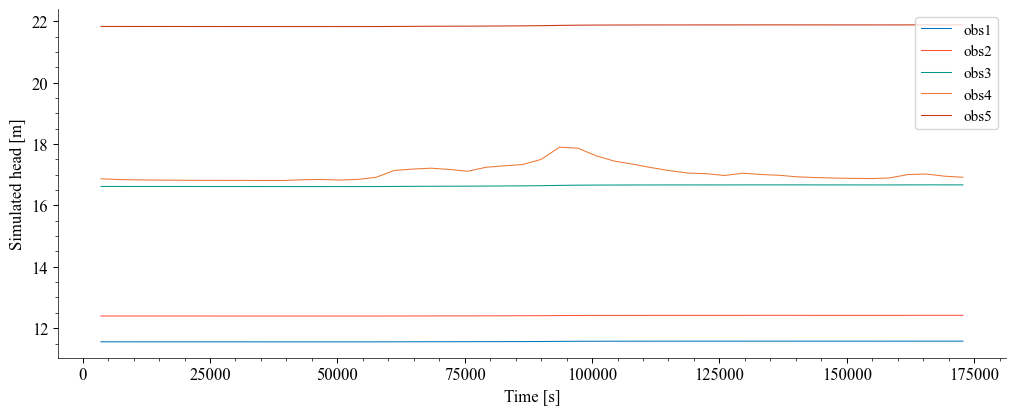

In [ ]:
# Plot the new timeseries data of the simulated values
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (10,4))
# Plot the simulated values for each observation point
for i in hob_out['Obs'].unique():
    
    x = np.array(hob_out[hob_out['Obs']==i]['time'])
    y = np.array(hob_out[hob_out['Obs']==i]['SIMULATED EQUIVALENT'])
    plt.plot(x,y,label = i)
# Define the labels and legend
plt.xlabel('Time [s]')
plt.ylabel('Simulated head [m]')
plt.legend()

In [ ]:
## Overwrite the .hob_out file with the new simulated values from the conduit system
new_hob_out = hob_out[['SIMULATED EQUIVALENT',
                        'OBSERVED VALUE', 'OBSERVATION NAME']]
new_hob_out.to_csv(os.path.join(p_folders['02_model_mf_syn'], f'{modelname}.hob_out'), sep="\t", index=False)